In [ ]:
!pip install opencv-python

# Funcs

In [1]:
from PIL import Image
import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt
import math
from numpy.fft import fft, ifft
import scipy.stats as st
import os
import shutil
import time

# from google.colab.patches import cv2.imshow

def loadVid(path):
  # video.mp4 -> np.array

  vidcap = cv2.VideoCapture(path)
  success,image = vidcap.read()

  path = "frames_orig"
  if os.path.exists(path):
    shutil.rmtree(path)
  time.sleep(.0000000000000001)
  os.makedirs(path)
  print("Directory '% s' created" % path)
  os.chdir(path)

  framesCount = 0
  while success:
    cv2.imwrite("frame%03d.jpg" % framesCount, image)     # save frame as JPEG file
    success,image = vidcap.read()

    # print('Read a new frame: ', success)
    framesCount += 1

  print("Video has been loaded. Frames count is", framesCount)

  frames = []
  # files = glob.glob("*.jpg")
  files = sorted(os.listdir())

  for frame in files:
      image = cv2.imread(frame)
      # print(type(image))
      frames.append(image)

  frames = np.array(frames)
  print('frames array shape:', frames.shape)
  # frames shape: (301, 592, 528, 3)
    # 301 frames
    # 592 high on 528 wide pixels each frame
    # 3 channels each pixel

  os.chdir("..")
  return frames

def frameInfo(path):

  im = np.array(Image.open(path))

  print("type(im) " , type(im))
  # <class 'numpy.ndarray'>

  print("im.shape ", im.shape)
  # (592, 528, 3)

  print("im.dtype " , im.dtype)
  # uint8

  print("pixel[0,0] is im[0, 0] = \n", im[0, 0]) #?
  # [100 150  60]
  # the value at (y, x) = (100, 150),
  # the 100th row and
  # 150th column of pixels

  print("row 0 is im[0, :] = \n", im[0, :])
  # the value at (y, :) = (0, :),
  # the 100th row and
  # all column of pixels

  # print(type(im[100, 105]))
  # <class 'numpy.ndarray'>

  print("pixel shape (im[0, 0]).shape = ", (im[0, 0]).shape)
  # (3,)

  print("row shape (im[100, :]).shape = " , (im[100, :]).shape)
  # (528, 3)

def shw(img):
  imgN = (img + 255) * 0.5
  # cv2.imshow('shw() function',imgN/255)
  # cv2.waitKey()
  # cv2.destroyAllWindows()
  # cv2.waitKey(1)
  return imgN

def cv2imshow(img):
  cv2.imshow('cv2imshow function',img/255)
  cv2.waitKey()
  cv2.destroyAllWindows()
  cv2.waitKey(1)

def toGS(img):
  rgb_weights = [0.2989, 0.5870, 0.1140]
  u = np.dot(img[...,:3], rgb_weights)
  print("u.shape = ", u.shape)
  return u

def ktoK(k, u):
  K = np.copy(k)

  while K.shape[0] < u.shape[0]:
    if K.shape[0]+2>u.shape[0]:
      K = np.pad(K, pad_width=((0, 1),(0, 0)), mode='constant', constant_values=0)
      break
    K = np.pad(K, pad_width=((1, 1),(0, 0)), mode='constant', constant_values=0)

  while K.shape[1] < u.shape[1]:
    if K.shape[1]+2>u.shape[1]:
      K = np.pad(K, pad_width=((0, 0),(0, 1)), mode='constant', constant_values=0)
      break
    K = np.pad(K, pad_width=((0, 0),(1, 1)), mode='constant', constant_values=0)

  return K


# # def GPyrExp(gp):
# #   pic = gp[0]
# #   gpE = []
# #   # print(type(gpE))
# #   for i in range(len(gp)):
# #     # print(i)
# #     pic = cv2.resize(gp[i], (gp[0].shape[1], gp[0].shape[0]), interpolation = cv2.INTER_LANCZOS4)
# #     # pic = cv2.pyrUp(gp[i])
# #     gpE.append(pic)
# #     # print(i)
# #   return np.array(gpE)
#
# # def LPyrW(gpE):
#
# #   lp = []
# #   for i in range(len(gpE)-1):
# #     # print(i)
# #     L = cv2.subtract(gpE[i],gpE[i+1])
# #     lp.append(L)
#
# #   lp.append()
# #   return np.array(lp)
#

In [2]:
def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    print("G.shape = ", kernel.shape)
    return kernel


# Hands on data

 Loading video into array or frames

In [3]:
# # frames = loadVid('/Users/klu/Downloads/face.mp4')
frames = loadVid('face.mp4')
# # frames = loadVid('/content/face.mp4')

Directory 'frames_orig' created
Video has been loaded. Frames count is 301
frames array shape: (301, 592, 528, 3)


In [6]:
print(frames.shape)
# framesGS = toGS(frames)

#
framesGS = frames[:,:,:,0]
#
#
# print("framesGS.shape = ", framesGS.shape)

(301, 592, 528, 3)


Lets have a look at out array of frames

In [7]:
print("frames[0] = \n")
cv2imshow(frames[0]) #meet Steve


frames[0] = 



In [8]:
print("framesGS[0][59:,220:] = \n")
# # cv2.destroyAllWindows()
# cv2.startWindowThread()
# cv2.namedWindow("preview")
# cv2.imshow("image", np.real(framesGS[0][59:,220:])/255)
cv2imshow(np.real(framesGS[0][59:,220:])/255)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.waitKey(1)
# # cv2.destroyAllWindows()

framesGS[0][59:,220:] = 



And display its info 

In [9]:
frameInfo('frames_orig/frame000.jpg')

type(im)  <class 'numpy.ndarray'>
im.shape  (592, 528, 3)
im.dtype  uint8
pixel[0,0] is im[0, 0] = 
 [242 237 243]
row 0 is im[0, :] = 
 [[242 237 243]
 [242 237 243]
 [242 237 243]
 ...
 [229 216 226]
 [229 216 226]
 [229 216 226]]
pixel shape (im[0, 0]).shape =  (3,)
row shape (im[100, :]).shape =  (528, 3)


# Naїve python method

In [10]:
def timePicFunc(framesArray, pxLineNumber):

  timePic = np.zeros([framesArray.shape[0], framesArray[0].shape[1], framesArray[0].shape[2]])
  # <class 'numpy.ndarray'> (592, 528, 3)

  for frameIndex in range(np.array(framesArray).shape[0]):
    timePic[frameIndex] = framesArray[frameIndex][pxLineNumber]

  cv2.imshow('pic',timePic/255)
  cv2.waitKey()
  cv2.destroyAllWindows()
  cv2.waitKey(1)


  return timePic

In [11]:
timePic = timePicFunc(frames, 0)

timePic = timePicFunc(frames, 53)
print(type(timePic))

<class 'numpy.ndarray'>


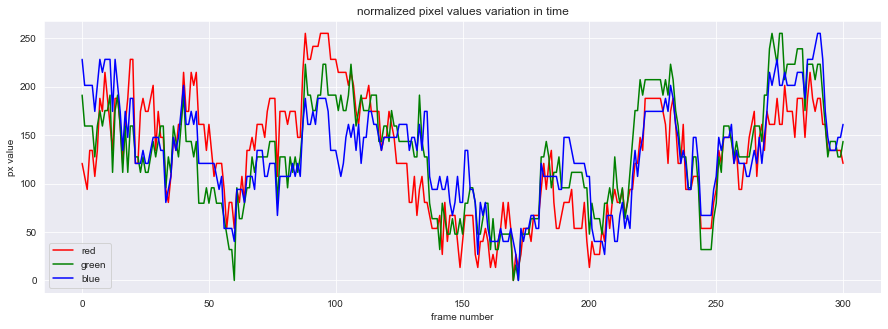

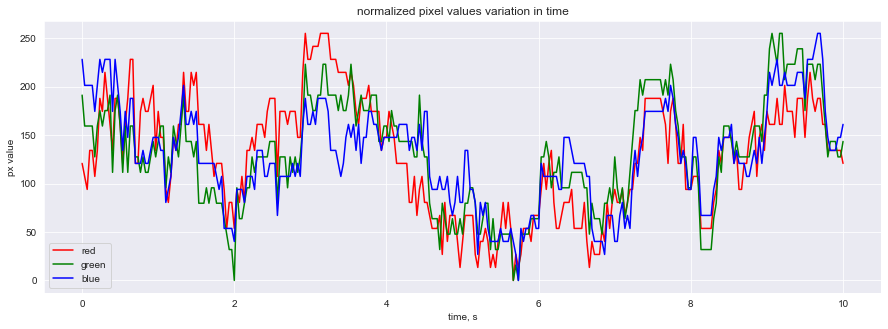

In [12]:
 # newH = 1500
# resized = cv2.resize(timePic, (timePic.shape[1], newH))
resized = timePic #resizing makes float numbers
# print('Resized Dimensions : ',resized.shape)
# cv2.imshow(resized)


# crop
  #wide line with less colour changings
crpW = resized[:, 166:320]
cv2imshow(crpW)
cv2.imwrite("crpW1.jpg", crpW)
crpW1 = crpW[:,:,0]
cv2imshow((crpW1 - crpW1.min())/(crpW1.max() - crpW1.min())* 255)
cv2.imwrite("crpW2.jpg", (crpW1 - crpW1.min())/(crpW1.max() - crpW1.min())* 255)
  #line
crp = resized[:, 319:320]
cv2imshow(crp)
cv2.imwrite("crp.jpg", crp)
crpLineRes = cv2.resize(crp, (crp.shape[0], 1000))
crpLineRes = crpLineRes[:,:,0]
cv2imshow((crpLineRes - crpLineRes.min())/(crpLineRes.max() - crpLineRes.min())* 255)
cv2.imwrite("crp2.jpg", (crpLineRes - crpLineRes.min())/(crpLineRes.max() - crpLineRes.min())* 255)
#separating into three channels
crp1 = crp[:,:,0]
crp2 = crp[:,:,1]
crp3 = crp[:,:,2]
cv2imshow((crp1 - crp1.min())/(crp1.max() - crp1.min())* 255)
cv2.imwrite("crp3.jpg", (crp1 - crp1.min())/(crp1.max() - crp1.min())* 255)
# cv2.imshow((crp2 - crp2.min())/(crp2.max() - crp2.min())* 255)
# cv2.imshow((crp3 - crp3.min())/(crp3.max() - crp3.min())* 255)

# Using Numpy to create an array X
X = np.arange(0,301)

# Assign variables to the y axis part of the curve
y1 = (crp1 - crp1.min())/(crp1.max() - crp1.min())* 255
y1 = y1[:,0]
y2 = (crp2 - crp2.min())/(crp2.max() - crp2.min())* 255
y2 = y2[:,0]
y3 = (crp3 - crp3.min())/(crp3.max() - crp3.min())* 255
y3 = y3[:,0]
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(X, y1, color='r', label='red')
plt.plot(X, y2, color='g', label='green')
plt.plot(X, y3, color='b', label='blue')
plt.xlabel("frame number")
plt.ylabel("px value")
plt.title("normalized pixel values variation in time")
plt.legend()
plt.show()


# resized1 = cv2.resize(y1, (y1.shape[0], 1000))
# X = np.arange(0,1000)
# plt.plot(X, resized1, color='r', label='y1')
# plt.rcParams["figure.figsize"] = (30,10)
# plt.show()




# 30 frames per second
X = np.arange(0, 301/30, 1/30)
y1 = (crp1 - crp1.min())/(crp1.max() - crp1.min())* 255
y1 = y1[:,0]
y2 = (crp2 - crp2.min())/(crp2.max() - crp2.min())* 255
y2 = y2[:,0]
y3 = (crp3 - crp3.min())/(crp3.max() - crp3.min())* 255
y3 = y3[:,0]
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(X, y1, color='r', label='red')
plt.plot(X, y2, color='g', label='green')
plt.plot(X, y3, color='b', label='blue')
plt.xlabel("time, s")
plt.ylabel("px value")
plt.title("normalized pixel values variation in time")
plt.legend()
plt.savefig("gr1.pdf")
plt.show()


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2099191216.py:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = scipy.linspace(0, 301/30, 301)
/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2099191216.py:18: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  pylab.plot(freqs,20*scipy.log10(FFT),'x')


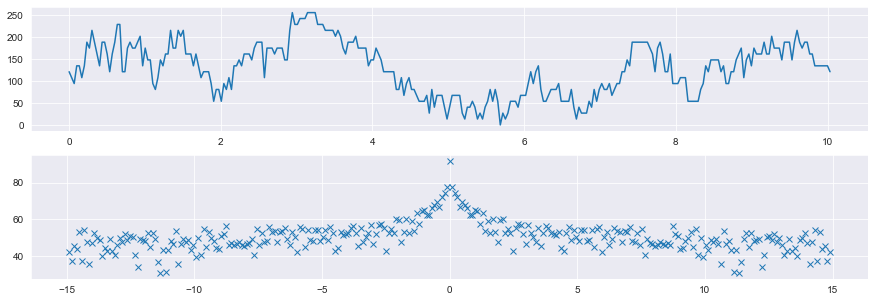

In [13]:
import scipy
import scipy.fftpack
import pylab
# from scipy import pi
t = scipy.linspace(0, 301/30, 301)

# acc = lambda t: 10*scipy.sin(2*pi*2.0*t) + 5*scipy.sin(2*pi*8.0*t) + 2*scipy.random.random(len(t))
y1 = (crp1 - crp1.min())/(crp1.max() - crp1.min())* 255
y1 = y1[:, 0]
# signal = acc(t)

FFT = abs(scipy.fftpack.fft(y1))
freqs = scipy.fftpack.fftfreq(y1.size, t[1]-t[0])

pylab.subplot(211)
pylab.plot(t, y1)
pylab.subplot(212)
pylab.plot(freqs,20*scipy.log10(FFT),'x')
plt.savefig("gr2.pdf")
# pylab.show()

/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2332148279.py:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = scipy.linspace(0,120,4000)
/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2332148279.py:6: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  acc = lambda t: 10*scipy.sin(2*pi*2.0*t) + 5*scipy.sin(2*pi*8.0*t) + 2*scipy.random.random(len(t))
/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2332148279.py:16: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  pylab.plot(freqs,20*scipy.log10(FFT),'x')


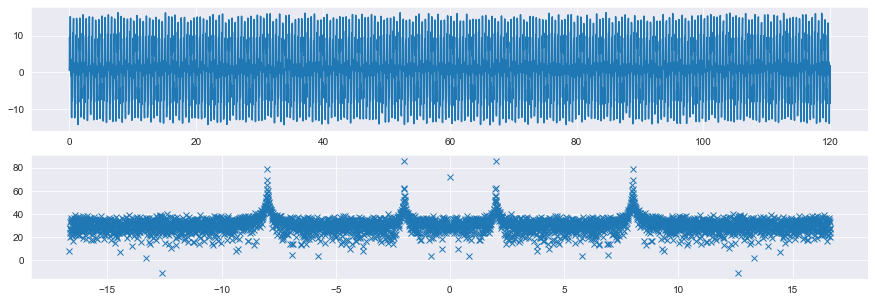

In [14]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi
t = scipy.linspace(0,120,4000)
acc = lambda t: 10*scipy.sin(2*pi*2.0*t) + 5*scipy.sin(2*pi*8.0*t) + 2*scipy.random.random(len(t))

signal = acc(t)

FFT = abs(scipy.fftpack.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

pylab.subplot(211)
pylab.plot(t, signal)
pylab.subplot(212)
pylab.plot(freqs,20*scipy.log10(FFT),'x')
pylab.show()

# (Convolution bad try)

because it's too long and resourcefull

In [15]:
rgb_weights = [0.2989, 0.5870, 0.1140]
u = np.dot(frames[0][...,:3], rgb_weights)
print("u = \n")
cv2imshow(u)
print("u.shape = ", u.shape)

G = gkern(15)
print("G = \n", G)
print("G.shape = ", G.shape)

u = 

u.shape =  (592, 528)
G.shape =  (15, 15)
G = 
 [[0.00017208 0.00031198 0.00051611 0.00077909 0.00107321 0.00134906
  0.00154753 0.00161997 0.00154753 0.00134906 0.00107321 0.00077909
  0.00051611 0.00031198 0.00017208]
 [0.00031198 0.00056561 0.00093568 0.00141245 0.00194567 0.00244578
  0.00280559 0.00293693 0.00280559 0.00244578 0.00194567 0.00141245
  0.00093568 0.00056561 0.00031198]
 [0.00051611 0.00093568 0.00154788 0.00233661 0.00321871 0.00404604
  0.00464127 0.00485854 0.00464127 0.00404604 0.00321871 0.00233661
  0.00154788 0.00093568 0.00051611]
 [0.00077909 0.00141245 0.00233661 0.00352724 0.00485881 0.00610771
  0.00700625 0.00733423 0.00700625 0.00610771 0.00485881 0.00352724
  0.00233661 0.00141245 0.00077909]
 [0.00107321 0.00194567 0.00321871 0.00485881 0.00669307 0.00841344
  0.00965119 0.01010298 0.00965119 0.00841344 0.00669307 0.00485881
  0.00321871 0.00194567 0.00107321]
 [0.00134906 0.00244578 0.00404604 0.00610771 0.00841344 0.01057602
  0.01213191 0.012

In [16]:
def Convolve(image, ker, bdSame):

  # if bdSame:
  hk = int((ker.shape[0]/2))
  imageB = np.pad(image, pad_width=int(ker.shape[0]/2), mode='constant', constant_values=0)

  # flip the kernel
  ker = np.flip(ker)

  newPic = np.zeros((image.shape[0], image.shape[1]))
  # cv2.imshow(image)
  idx = np.arange(-int((ker.shape[0]/2)), int((ker.shape[0]/2))+1)
  # print(idx.shape)
  # print(idx)

  for x in range(image.shape[0]-1):
    for y in range(image.shape[1]-1):

      # print("counting for pixel [",x, ", ", y, "]")
      # print("image[x][y] = ", image[x][y])
      for i in idx:
        for j in idx:
          # print("[", i, ", ", j, "]")
          newPic[x][y] += imageB[x+int((ker.shape[0]/2))-i][y+int((ker.shape[0]/2))-j]*ker[(np.where(idx == i))[0][0]][(np.where(idx == j))[0][0]]
          # newPic[x][y] += imageB[x-i][y-j]*ker[(np.where(idx == i))[0][0]][(np.where(idx == j))[0][0]]

          # print("newPic[x][y] = ", newPic[x][y])




  return newPic

ker = np.zeros([5,5])
ker[0,0]=1
print(ker)
newPic = Convolve(u, ker, True)
cv2imshow(newPic)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Convolution good try


##1d convolution

In [17]:
# 1d convolution

u = np.array([1, 2, 3, 4, 5, 6])
print("u = ", u)
G = np.array([0, 0, 1, 0, 0])
print("G = ", G)
N = u.size - 1
print("N = ", N)
pd = int(G.shape[0]/2)
v = np.zeros(u.shape[0])
#extending u
u = np.pad(u, pad_width=pd, mode='constant', constant_values=0)


# padding
idx = np.arange(-int((G.shape[0]/2)), int((G.shape[0]/2))+1)
print("idx = ", idx)



# loop
for i in idx:
  print("\n\ni = ", i, "(but in python it's ", i+pd, ")")
  print("G[", i, "] = " , G[i+pd], " \n *")
  tmp = u[i+pd:N+i+1+pd]
  print("u [", i, ":", N+i+1, "] = ", tmp, "\n =")
  v += G[i+pd] * u[i+pd:N+i+1+pd]
  print(v)



u =  [1 2 3 4 5 6]
G =  [0 0 1 0 0]
N =  5
idx =  [-2 -1  0  1  2]


i =  -2 (but in python it's  0 )
G[ -2 ] =  0  
 *
u [ -2 : 4 ] =  [0 0 1 2 3 4] 
 =
[0. 0. 0. 0. 0. 0.]


i =  -1 (but in python it's  1 )
G[ -1 ] =  0  
 *
u [ -1 : 5 ] =  [0 1 2 3 4 5] 
 =
[0. 0. 0. 0. 0. 0.]


i =  0 (but in python it's  2 )
G[ 0 ] =  1  
 *
u [ 0 : 6 ] =  [1 2 3 4 5 6] 
 =
[1. 2. 3. 4. 5. 6.]


i =  1 (but in python it's  3 )
G[ 1 ] =  0  
 *
u [ 1 : 7 ] =  [2 3 4 5 6 0] 
 =
[1. 2. 3. 4. 5. 6.]


i =  2 (but in python it's  4 )
G[ 2 ] =  0  
 *
u [ 2 : 8 ] =  [3 4 5 6 0 0] 
 =
[1. 2. 3. 4. 5. 6.]


## 2d convolution

In [18]:
# 2d convolution
u = np.arange(30).reshape(6, 5)
print("u = \n", u)
print("u.shape = ", u.shape)

G = np.zeros([3,3])
G[1][1] = 1
print("G = \n", G)

n = u.shape[0] - 1
print("n = ", n)

N = u.shape[1] - 1
print("N = ", N)

pd = np.array([int(G.shape[0]/2), int(G.shape[1]/2)])
print("pd = ", pd)

v = np.zeros((u.shape[0], u.shape[1]))
# print("v = \n", v)
print("v.shape = ", v.shape)

#extending u
u = np.pad(u, pad_width=pd, mode='constant', constant_values=0)
print("u = \n", u)
print("u.shape = ", u.shape)

# padding
idx0 = np.arange(-int((G.shape[0]/2)), int((G.shape[0]/2))+1)
idx1 = np.arange(-int((G.shape[1]/2)), int((G.shape[1]/2))+1)
print("idx0 = ", idx)
print("idx1 = ", idx)

# loop
  # indexes in u and G are shown in i,j notation [idx], not as python sees it (without padding)
for i in idx0:
  for j in idx1:
    print("\n\ni, j = ", i, j, "(but in python it's ", i+pd[0], j+pd[1], ")")
    print("G[", i, ",", j, "] = " , G[i+pd[0], j+pd[1] ], " \n *")
    print("u [", i, ":", n+i+1, ",", j, ":", N+j+1, "] = \n", u[i+pd[0]:n+i+1+pd[0], j+pd[1]:N+j+1+pd[1]], "\n =")
    v += G[i+pd[0], j+pd[1]] * u[i+pd[0]:n+i+1+pd[0], j+pd[1]:N+j+1+pd[1]]
    print("v = \n", v)

print(v)

u = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
u.shape =  (6, 5)
G = 
 [[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
n =  5
N =  4
pd =  [1 1]
v.shape =  (6, 5)
u = 
 [[ 0  0  0  0  0  0  0]
 [ 0  0  1  2  3  4  0]
 [ 0  5  6  7  8  9  0]
 [ 0 10 11 12 13 14  0]
 [ 0 15 16 17 18 19  0]
 [ 0 20 21 22 23 24  0]
 [ 0 25 26 27 28 29  0]
 [ 0  0  0  0  0  0  0]]
u.shape =  (8, 7)
idx0 =  [-2 -1  0  1  2]
idx1 =  [-2 -1  0  1  2]


i, j =  -1 -1 (but in python it's  0 0 )
G[ -1 , -1 ] =  0.0  
 *
u [ -1 : 5 , -1 : 4 ] = 
 [[ 0  0  0  0  0]
 [ 0  0  1  2  3]
 [ 0  5  6  7  8]
 [ 0 10 11 12 13]
 [ 0 15 16 17 18]
 [ 0 20 21 22 23]] 
 =
v = 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


i, j =  -1 0 (but in python it's  0 1 )
G[ -1 , 0 ] =  0.0  
 *
u [ -1 : 5 , 0 : 5 ] = 
 [[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22

In [19]:
G

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [20]:
# 2d convolution


def Convolve(u, G, bdSame):
  print("Convolve")
  print(u.dtype)
  print(G.dtype)


  n = u.shape[0] - 1
  # print("n = ", n)

  N = u.shape[1] - 1
  # print("N = ", N)

  pd = np.array([int(G.shape[0]/2), int(G.shape[1]/2)])
  #print("pd = ", pd)

  v = np.zeros((u.shape[0], u.shape[1]))
  # print("v = \n", v)
  # print("v.shape = ", v.shape)


  # padding
  idx0 = np.arange(-int((G.shape[0]/2)), int((G.shape[0]/2))+1)
  idx1 = np.arange(-int((G.shape[1]/2)), int((G.shape[1]/2))+1)
  # print("idx0 = ", idx0)
  # print("idx1 = ", idx1)

  if bdSame: #zeros border = True
    #extending u
    u = np.pad(u, pad_width=pd, mode='constant', constant_values=0)
    # print("u = \n", u)
    # print("u.shape = ", u.shape)

    # loop
    for i in idx0:
      for j in idx1:
        # print("\n\ni, j = ", i, j, "(but in python it's ", i+pd[0], j+pd[1], ")")
        # print("G[", i, ",", j, "] = " , G[i+pd[0], j+pd[1] ], " \n *")
        # print("u [", i, ":", n+i+1, ",", j, ":", N+j+1, "] = \n", u[i+pd[0]:n+i+1+pd[0], j+pd[1]:N+j+1+pd[1]], "\n =")
        v += G[i+pd[0], j+pd[1]] * u[i+pd[0]:n+i+1+pd[0], j+pd[1]:N+j+1+pd[1]]
        # print("v = \n", v)

  else: #periodic border = False
    for i in idx0:
      for j in idx1:
        # print("\n\ni, j = ", i, j, "(but in python it's ", i+pd[0], j+pd[1], ")")
        # print("G[", i, ",", j, "] = " , G[i+pd[0], j+pd[1] ], " \n *")
        # print("u [", i%n, ":", (n+i+1)%n, ",", j%N, ":", (N+j+1)%N, "] = \n", np.roll(u, (i, j), axis = (0,1)), "\n =")
        v += G[i+pd[0], j+pd[1]] * np.roll(u, (i, j), axis = (0,1))
        # print("v = \n", v)

  return v



## small 2d array convolution demonstarion

In [21]:
u = np.arange(30).reshape(6, 5)
print("u = \n", u)
print("u.shape = ", u.shape)

G = np.zeros([3,3]) #it doesn't work with non square G, it should though(( #(?)
G[1][1] = 1
# print("G = \n", G)

u = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
u.shape =  (6, 5)


In [22]:
v = Convolve(u, G, True)
print(v)

Convolve
int64
float64
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29.]]


In [23]:
v = Convolve(u, G, False)
print(v)

Convolve
int64
float64
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29.]]


## grayscale image convolution demonstraion

In [24]:
rgb_weights = [0.2989, 0.5870, 0.1140]
u = np.dot(frames[0][...,:3], rgb_weights)
print("u = \n")
cv2imshow(u)
print("u.shape = ", u.shape)

G = gkern(9)
# print("G = \n", G)
print("G.shape = ", G.shape)


print("Convolution with black borders:")
v = Convolve(u, G, True)
cv2imshow(v)

print("Convolution with periodical borders:")
v = Convolve(u, G, False)
cv2imshow(v)

u = 

u.shape =  (592, 528)
G.shape =  (9, 9)
G.shape =  (9, 9)
Convolution with black borders:
Convolve
float64
float64
Convolution with periodical borders:
Convolve
float64
float64


# Pyramids

In [25]:
# generate Gaussian pyramid
def GPyr(pic, depth):

  v = pic.copy()
  gp = [v]

  for i in range(depth):
    v = Convolve(v, G, True)
    # v = cv2.filter2D(v, -1, G)
    v = v[::2,::2]
    gp.append(v)

  return gp

In [26]:
# u = toGS(frames[0])
# G = gkern(11)
#
# gp = GPyr(u, 4)
#
# for ph in gp:
#   cv2.imshow("ph", ph)
#   cv2.waitKey(0)

# print("gp.shape = ", gp.shape)
# print(gp)

In [27]:
# generate Laplacian Pyramid
def LPyr(gp):

  lp = []
  for i in range(len(gp)-1):
    # print(i)
    pic = cv2.resize(gp[i+1], (gp[i].shape[1], gp[i].shape[0]), interpolation = cv2.INTER_LANCZOS4)
    L = cv2.subtract(gp[i],pic)
    lp.append(L)

  lp.append(gp[-1])
  return lp


In [28]:
# # u = toGS(frames[0])
# # G = gkern(9)
# # gp = GPyr(u, 4)
# #
# # lp = LPyr(gp)
# #
# # for pic in lp:
# #   shw(pic)
# #
# # # print(np.shape(lp))

In [29]:
def rec(lp):
  # np.array -> np.array
  pic = np.real(lp[-1])
  # print(type(pic[0][0]))
  # pic = np.real(pic)
  # print(type(pic[0][0]))

  for i in range(len(lp)-2, -1, -1):
    pic = np.real(lp[i]) + cv2.resize(pic, (lp[i].shape[1], lp[i].shape[0]), interpolation = cv2.INTER_LANCZOS4)

  return pic

In [30]:
# # RECed = REC(ADDed)

In [31]:
def LPyrOpt(pic, depth):

  gp = GPyr(pic, depth)

  lp = []

  for i in range(len(gp)-1):
    # print(i)
    pic = cv2.resize(gp[i+1], (gp[i].shape[1], gp[i].shape[0]), interpolation = cv2.INTER_LANCZOS4)
    L = cv2.subtract(gp[i],pic)
    lp.append(L)

  lp.append(gp[-1])
  return lp

In [32]:
gp = GPyr(framesGS[0], 4)
# print(gp.shape)

lp = LPyr(gp)
# print(lp.shape)

lp = LPyrOpt(framesGS[0], 5)


R = rec(lp)
shw(R)
cv2imshow(R)
cv2imshow(framesGS[0])
cv2imshow(R-framesGS[0])
np.max(R-framesGS[0])

Convolve
uint8
float64
Convolve
float64
float64
Convolve
float64
float64
Convolve
float64
float64


error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'


In [ ]:
G = gkern(9)

lp = LPyrOpt(framesGS[0], 5)

for pic in lp:
  shw(pic)

# FFT

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline


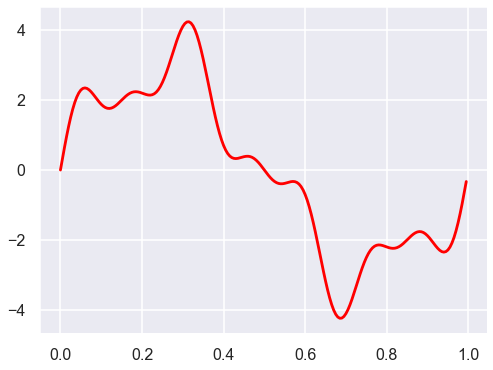

In [91]:
def FFT(x):
    """
    A recursive implementation of
    the 1D Cooley-Tukey FFT, the
    input should have a length of
    power of 2.
    """
    N = len(x)

    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)

        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X

# sampling rate
sr = 200
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3 * np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5 * np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')

plt.show()

(200,)


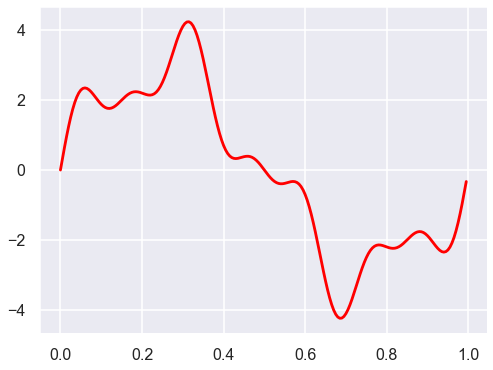

/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/4164296310.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/4164296310.py:37: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(f_oneside, abs(X_oneside), 'b', \


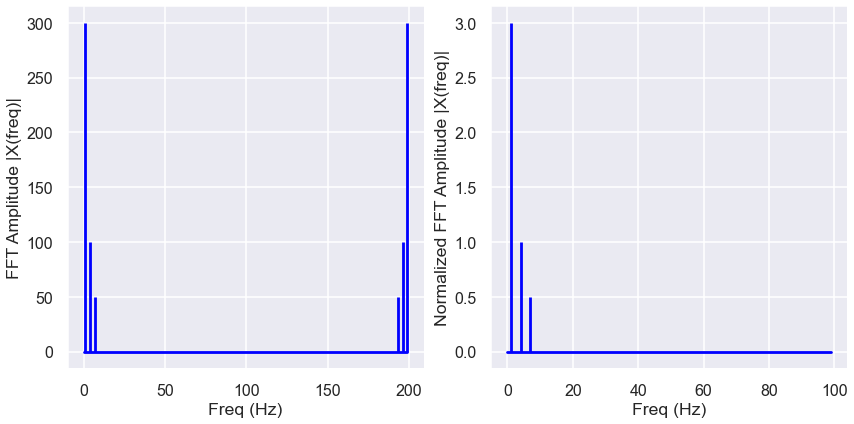

In [92]:
from numpy.fft import fft, ifft
X=fft(x)
print(X.shape)
# print(X)

# sampling rate
sr = 200
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.show()

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [ ]:

# # def gen_sig(sr):
# #     '''
# #     function to generate
# #     a simple 1D signal with
# #     different sampling rate
# #     '''
# #     ts = 1.0/sr
# #     t = np.arange(0,1,ts)
#
# #     freq = 1.
# #     x = 3*np.sin(2*np.pi*freq*t)
# #     return x
#
#
# # # sampling rate = 2048
# # sr = 2048
# # %timeit FFT(gen_sig(sr))
#

## FFT np

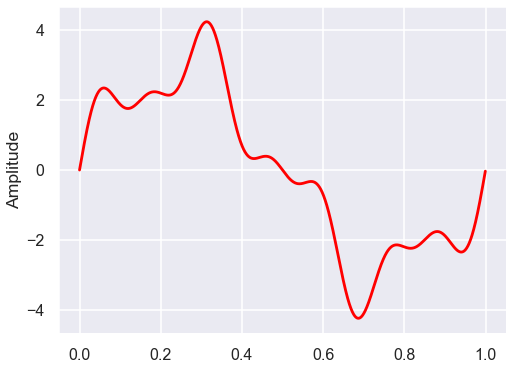

/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2744587176.py:32: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")


<Figure size 864x432 with 0 Axes>

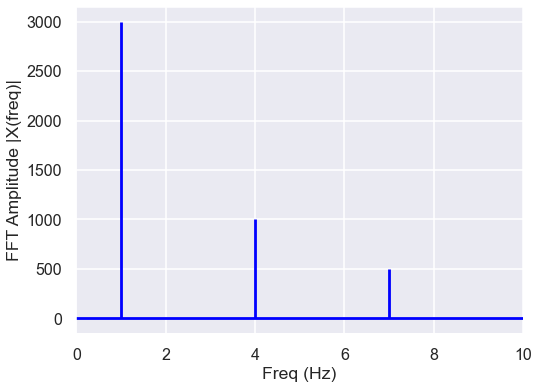

/Users/klu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


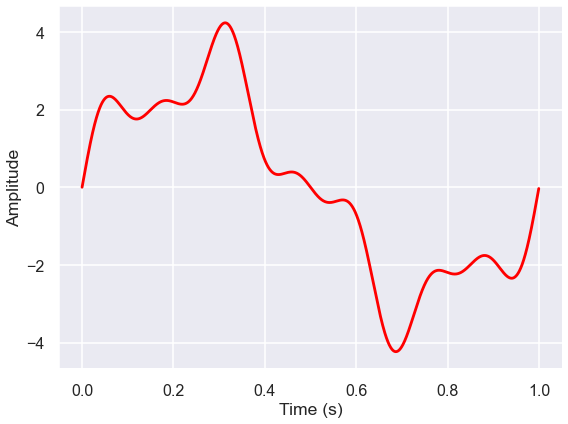

In [36]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
# plt.savefig("func.pdf")
plt.show()


X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))

plt.figure(figsize = (8, 6))
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.savefig("fft_of_func.pdf")
plt.show()

plt.figure(figsize = (8, 6))
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig("ifft_of_func.pdf")
plt.show()

## 2D FFT

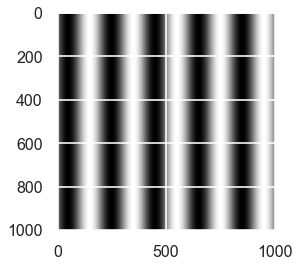

In [37]:
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

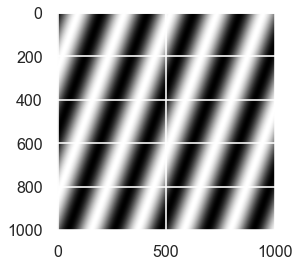

In [38]:
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 200
angle = np.pi / 9
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

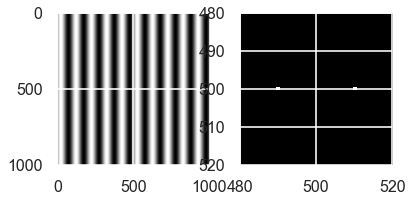

In [39]:
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

# wavelength = 200
wavelength = 100
angle = 0
grating = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

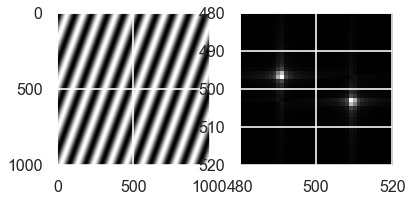

In [40]:
x = np.arange(-500, 501, 1)

X, Y = np.meshgrid(x, x)

wavelength = 100
angle = np.pi/9
grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength )

plt.set_cmap("gray")

plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

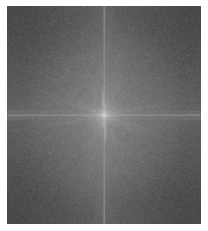

In [105]:
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)
    # return ft
# Read and process image

rgb_weights = [0.2989, 0.5870, 0.1140]
image = np.dot(frames[0][...,:3], rgb_weights)


plt.set_cmap("gray")

ft = calculate_2dft(image)

# plt.subplot(121)
# plt.imshow(image)
# plt.axis("off")
# plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis("off")
plt.savefig("fft.jpg")
plt.show()

# LP




In [96]:
# read input and convert to grayscale
img = image

# do dft saving as complex output
dft = np.fft.fft2(img, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

# create circle mask
radius = 40
mask = np.zeros_like(img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255


# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)


cv2imshow(img)
cv2.imwrite("1img.jpg", img)
cv2imshow(spec)
cv2.imwrite("2spec.jpg", spec)
cv2imshow(mask)
cv2.imwrite("3mask.jpg", mask)
cv2imshow(mask2)
cv2.imwrite("4mask2.jpg", mask2)
cv2imshow(img_back)
cv2.imwrite("5img_back.jpg", img_back)
cv2imshow(img_filtered)
cv2.imwrite("6img_filtered.jpg", img_filtered)
cv2imshow(img_filtered2)
cv2.imwrite("7img_filtered2.jpg", img_filtered2)

True

# HP




In [43]:
# # # read input and convert to grayscale
# # img = image
# #
# # # do dft saving as complex output
# # dft = np.fft.fft2(img, axes=(0,1))
# #
# # # apply shift of origin to center of image
# # dft_shift = np.fft.fftshift(dft)
# #
# # # generate spectrum from magnitude image (for viewing only)
# # mag = np.abs(dft_shift)
# # spec = np.log(mag) / 20
# #
# # # create white circle mask on black background and invert so black circle on white background
# # radius = 32
# # mask = np.zeros_like(img)
# # cy = mask.shape[0] // 2
# # cx = mask.shape[1] // 2
# # cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]
# # mask = 255 - mask
# #
# # # blur the mask
# # mask2 = cv2.GaussianBlur(mask, (19,19), 0)
# #
# # # apply mask to dft_shift
# # dft_shift_masked = np.multiply(dft_shift,mask) / 255
# # dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255
# #
# #
# # # shift origin from center to upper left corner
# # back_ishift = np.fft.ifftshift(dft_shift)
# # back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
# # back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)
# #
# #
# # # do idft saving as complex output
# # img_back = np.fft.ifft2(back_ishift, axes=(0,1))
# # img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
# # img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))
# #
# # # combine complex real and imaginary components to form (the magnitude for) the original image again
# # # multiply by 3 to increase brightness
# # img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
# # img_filtered = np.abs(3*img_filtered).clip(0,255).astype(np.uint8)
# # img_filtered2 = np.abs(3*img_filtered2).clip(0,255).astype(np.uint8)
# #
# # cv2imshow(img)
# # cv2imshow(spec)
# # cv2imshow(mask)
# # cv2imshow(mask2)
# # cv2imshow(img_back)
# # cv2imshow(img_filtered)
# # cv2imshow(img_filtered2)

# convolution and FFT multip convolution comparison

In [44]:
# # u = framesGS[0]
# # print("u = \n")
# # cv2.imshow("u", u)

In [45]:
# # import cv2
# # import numpy as np
# # from matplotlib import pyplot as plt
#
# # img = u
# # f = np.fft.fft2(img)
# # fshift = np.fft.fftshift(f)
# # magnitude_spectrum = 20*np.log(np.abs(fshift))
# # ufft = f
#
# # plt.subplot(121),plt.imshow(img, cmap = 'gray')
# # plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# # plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
# # plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
#
# # plt.show()

In [46]:

# # import cv2
# # import numpy as np
# # from matplotlib import pyplot as plt
#
# # img = ktoK(gkern(21), u)
# # img1 = np.fft.ifftshift(img)
# # f = np.fft.fft2(img1)
# # fshift = np.fft.fftshift(f)
# # magnitude_spectrum = 20*np.log(1+np.abs(fshift))
# # kfft = f
#
# # plt.subplot(121),plt.imshow(img, cmap = 'gray')
# # plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# # plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
# # plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
# # plt.show()

In [47]:
# # # ufft*kfft
# # from scipy import fftpack
# # from scipy.fftpack import fft2, ifft2
#
# # # conv = ufft * kfft
# # conv = np.multiply(ufft , kfft)
# # # im_new = fftpack.ifft2(conv).real
#
# # # plt.figure()
# # # plt.imshow(im_new, plt.cm.gray)
# # # plt.title('Reconstructed Image')
#
#
#
# # img_back = np.fft.ifft2(conv).real
# # # img_back_shift = np.fft.fftshift(img_back)
# # img_back = (np.abs(img_back))
#
# # plt.subplot(131),plt.imshow(img_back, cmap = 'gray')
# # plt.title('image convolved 2'), plt.xticks([]), plt.yticks([])
# # fft = np.fft.fft2(img_back)
# # fft = np.fft.fftshift(fft).real
# # magnitude_spectrum = 20*np.log(1+np.abs(fft))
# # plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
# # plt.title('fft'), plt.xticks([]), plt.yticks([])
# # # plt.subplot(133),plt.imshow(v, cmap = 'gray')
# # plt.title('image convoled 1'), plt.xticks([]), plt.yticks([])
# # plt.show()

In [48]:
# # plt.title("Reconstructed")
# # plt.imshow(magnitude_spectrum.astype(np.uint8))
# # plt.show()

# signl extraction & filtering

In [49]:
signl = np.zeros([frames.shape[1], frames.shape[2], frames.shape[0], frames.shape[3]])

for i in range(frames[0].shape[0]):
  for j in range(frames[0].shape[1]):
    signl[i,j,:] = frames[:,i,j]



In [ ]:
# # frames.shape

In [ ]:
# # signl.shape

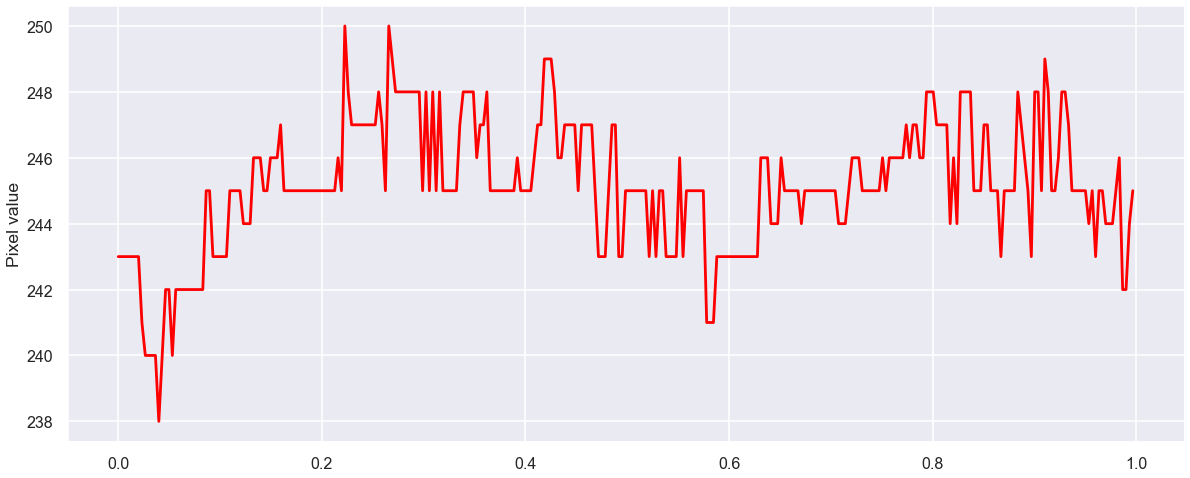

In [50]:
# sampling rate
sr = 301
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

plt.figure(figsize = (20, 8))
plt.plot(t, signl[0, 0, :, 0], 'r')
plt.ylabel('Pixel value')

plt.show()

signal1 = signl[0, 0, :, 0]


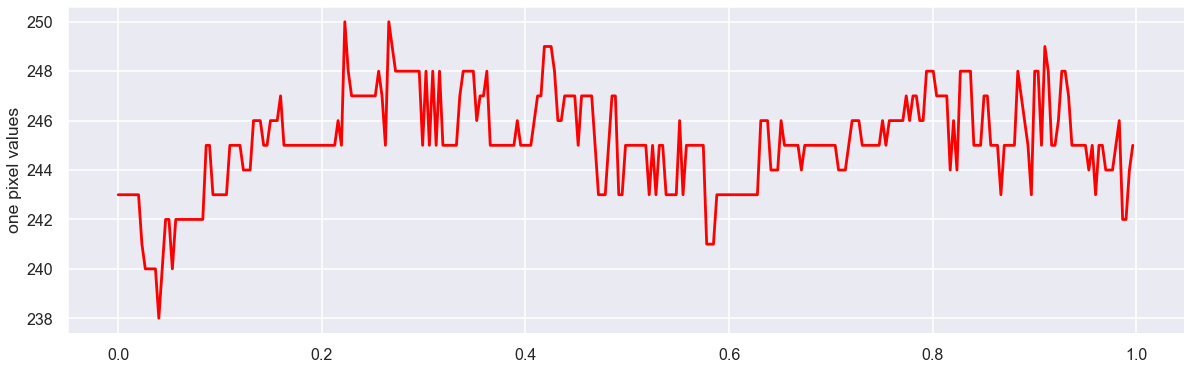

/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3463997107.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3463997107.py:34: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.log(np.abs(X)), 'b', markerfmt=" ", basefmt="-b")
/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3463997107.py:38: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq[1:], np.log(np.abs(X))[1:], 'b', markerfmt=" ", basefmt="-b")


<StemContainer object of 3 artists>

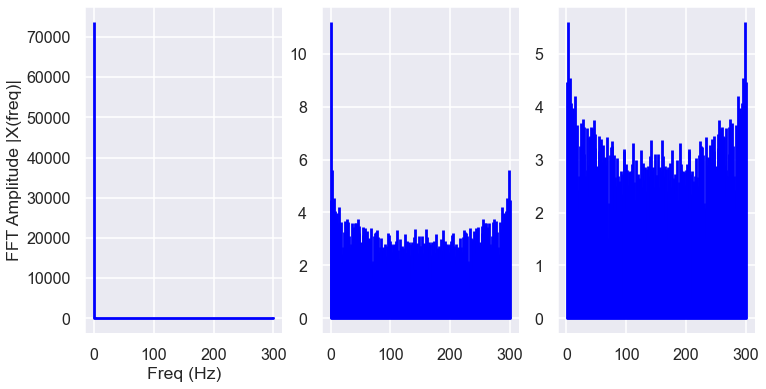

In [51]:
from numpy.fft import fft, ifft

# sampling rate
sr = 301
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

x = signl[0, 0, :, 0]

plt.figure(figsize = (20, 6))
plt.plot(t, x, 'r')
plt.ylabel('one pixel values')

plt.show()


X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(131)
X = X[0:]
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
# plt.xlim(0, 0.00001)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')


plt.subplot(132)
plt.stem(freq, np.log(np.abs(X)), 'b', markerfmt=" ", basefmt="-b")

plt.subplot(133)

plt.stem(freq[1:], np.log(np.abs(X))[1:], 'b', markerfmt=" ", basefmt="-b")


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2075083372.py:7: RuntimeWarning: divide by zero encountered in log
  x_flog = np.log(x_f)


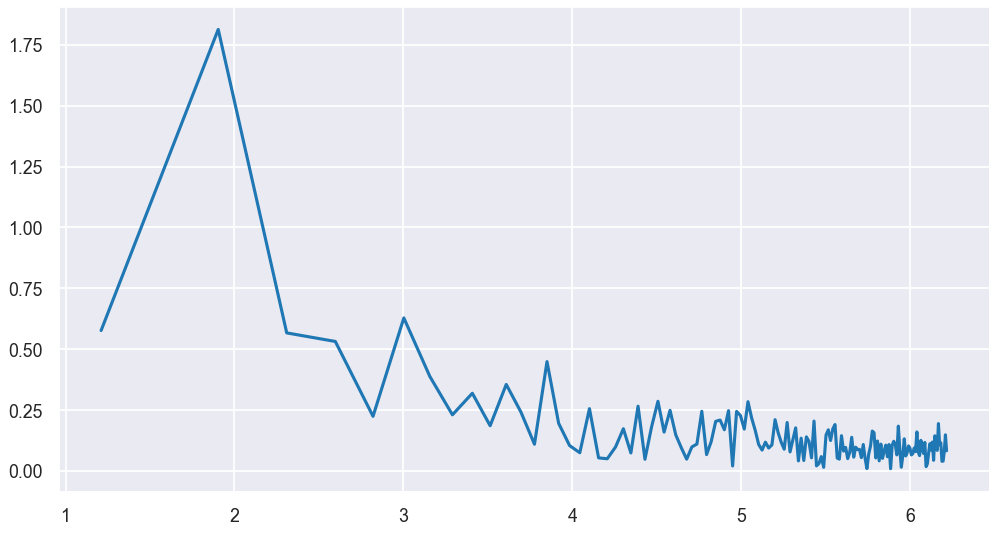

In [52]:
import scipy
from matplotlib.pyplot import figure

T = 1.0 / 1000.0
y_f = scipy.fft.fft(signl[0, 0, :, 0])
x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)
x_flog = np.log(x_f)

figure(figsize=(15, 8), dpi=80)
plt.plot(x_flog, 2.0/N * np.abs(y_f[:N//2]))
plt.show()

In [ ]:
# # np.shape(signl[0, 0, :, 0])

In [ ]:
# # y_f.shape

In [ ]:
# # I = np.array([0, 1, 2, -2, -1])
# # 1*((I>=1)&(I<=2))|((I>=-2)&(I<=-1))
# # #

# Filtering

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft

plt.style.use('seaborn-poster')
%matplotlib inline

def show(xpoints, ypoints):
  plt.plot(xpoints, ypoints)
  plt.show()

def showFFT(xpoints, ypoints):
  plt.figure(figsize = (12, 6))
  plt.stem(xpoints, ypoints, 'b', markerfmt=" ", basefmt="-b")
  plt.show()

def signalAxesX(signal, sr):
  # np.array x float -> np.array x np.array
  # getting arrays for axes X for correct displaying the signal both
  # in time domain and Fourier domain

  N = len(signal)
  # t = np.arange(0, N/sr, 1/sr)
  t = np.arange(N)/sr

  n = np.concatenate((np.arange((N+1)//2), np.arange((N+1)//2 - N , 0)))
  T = N/sr
  freq = n/T

  return t, freq


In [74]:
def filter(g1, g2, l):
  # xpoints = np.array([-l, -g2, -g2, -g1, -g1, g1, g1, g2, g2, l])
  # ypoints = np.array([0, 0, 1, 1, 0, 0, 1,1,0,0])

  xpoints = np.array([-l, -g2, -(g2+g1)/2, -g1, g1, (g2+g1)/2, g2, l])
  ypoints = np.array([0, 0, 1, 0, 0, 1,0,0])
  return xpoints, ypoints

## Test signal

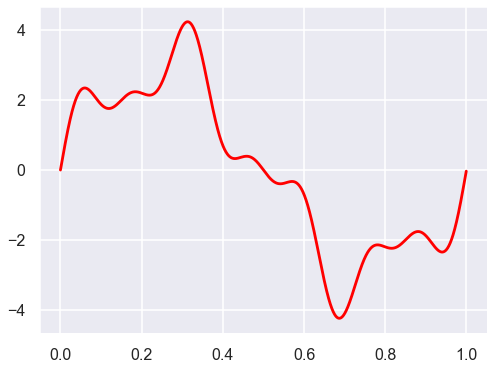

In [58]:
def CreateTestSignal():
  # creates custom synthetic signal for test
  # returns signal and time array for axes X


  # sampling rate
  sr = 2000
  # sampling interval
  ts = 1.0/sr
  t = np.arange(0,1,ts)

  freq = 1
  x = 3*np.sin(2*np.pi*freq*t)

  freq = 4
  x += np.sin(2*np.pi*freq*t)

  freq = 7
  x += 0.5*np.sin(2*np.pi*freq*t)
  return t, x


t, x = CreateTestSignal()

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.show()

# calculate the frequency
X = fft(x)

t, freq = signalAxesX(x, 2000)


In [66]:
!ls

1D_INTER_CUBIC.pdf             face.mp4
1D_INTER_LANCZOS4.pdf          fft_and_ifft_of_func.pdf
1D_INTER_LINEAR.pdf            fft_of_func.jpg
1D_INTER_NEAREST.pdf           fft_of_func.pdf
Artem.mp4                      frames
Artem2.mp4                     frames_orig
CH0.npy                        frm_small.jpg
CH1.npy                        func.pdf
CH2.npy                        gr1.pdf
EVM.ipynb                      gr2.pdf
EVMn.ipynb                     ifft_of_func.jpg
G=21_blurry_frame[0].jpg       ifft_of_func.pdf
G=21_blurry_frame[0]_False.jpg new.ipynb
INTER_AREA.jpg                 orig.jpg
INTER_CUBIC.jpg                saved images
INTER_LANCZOS4.jpg             saveimg.ipynb
INTER_LINEAR.jpg               shw(lp0[0]).jpg
INTER_NEAREST.jpg              shw(lp0[1]).jpg
MyMovie.mp4                    shw(lp0[2]).jpg
Saved results                  shw(lp0[3]).jpg
cookie.mp4                     shw(lp0[4]).jpg
crp.jpg                        shw(lp[0]).jpg
crp2.jpg           

/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/2438149535.py:2: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")


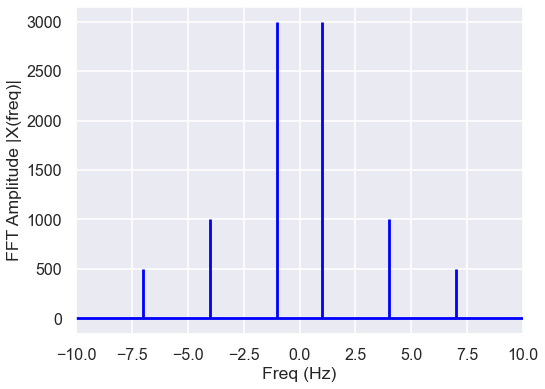

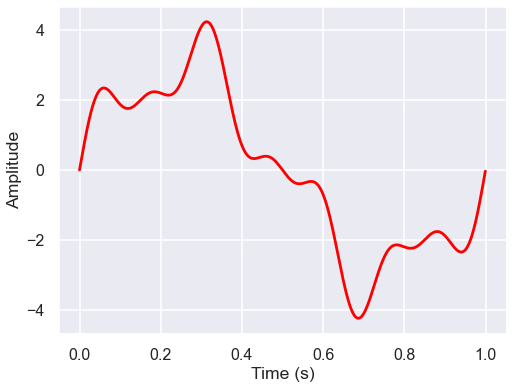

In [67]:
plt.figure(figsize = (8, 6))
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(-10, 10)

plt.savefig("fft_of_func.jpg")
plt.show()
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside


# plt.subplot(122)
# plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
# plt.xlabel('Freq (Hz)')
# plt.ylabel('Closer look to FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)
# plt.tight_layout()
# plt.show()



# plt.subplot(122)
plt.figure(figsize = (8, 6))
plt.plot(t, np.real(ifft(X)), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.tight_layout()

plt.savefig("ifft_of_func.jpg")
plt.show()

In [83]:
# xpoints = np.array([-l, -g2, -(g2+g1)/2, -g1, g1, (g2+g1)/2, g2, l])
# ypoints = np.array([0, 0, 1, 0, 0, 1,0,0])

def filter(xpoints, ypoints, g1, g2):
  # xpoints = np.array([-l, -g2, -g2, -g1, -g1, g1, g1, g2, g2, l])
  # ypoints = np.array([0, 0, 1, 1, 0, 0, 1,1,0,0])

  # I = np.array([0, 1, 2, -2, -1])
  # 1*((I>=1)&(I<=2))|((I>=-2)&(I<=-1))

  if xpoints.shape == ypoints.shape:
    filt = 1*((xpoints>=g1)&(xpoints<=g2))|((xpoints>=-g2)&(xpoints<=-g1))
  else:
    print("Error, shapes xp and yp don't match.")

  return ypoints * filt


def Filter(signalFFT, g1, g2):
  # function with demonstarion of filtering, main work of which is
  # using "filter" function. Retunrns y points filtered (in Fourier domain, filtered freqs)
  #
  # ypftd = Filter([xp, yp], 0, 6)
  # xp, yp is array of points
  # g1, g2 filter limits


  print("FFT signal was: ")
  plt.stem(signalFFT[0], abs(signalFFT[1]), 'b', markerfmt=" ", basefmt="-b")
  plt.xlim(-10, 10)
  plt.savefig("Filter_FFTsignalwas.pdf")
  plt.show()

  ypftd = filter(signalFFT[0], signalFFT[1], g1, g2)

  print("Filter is: ")
  plt.stem(signalFFT[0], 1*((signalFFT[0]>=g1)&(signalFFT[0]<=g2))|((signalFFT[0]>=-g2)&(signalFFT[0]<=-g1)), 'b', markerfmt=" ", basefmt="-b")
  plt.xlim(-10, 10)
  plt.savefig("Filter_Filteris.pdf")
  plt.show()

  print("Filtered FFT signal is: ")
  plt.stem(signalFFT[0], abs(ypftd), 'b', markerfmt=" ", basefmt="-b")
  plt.xlim(-10, 10)
  plt.savefig("Filter_FilteredFFTsignalis.pdf")
  plt.show()

  return ypftd


# def add_filtered(signalFFT, ypftd):
#   res = ifft(signalFFT[1]) + ifft(ypftd)
#   for el in res:
#     if el < 0:
#       el = 0
#     elif el > 255:
#       el = 255
#     else:
#       pass
#
#   return res


FFT signal was: 


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3014482676.py:29: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(signalFFT[0], abs(signalFFT[1]), 'b', markerfmt=" ", basefmt="-b")


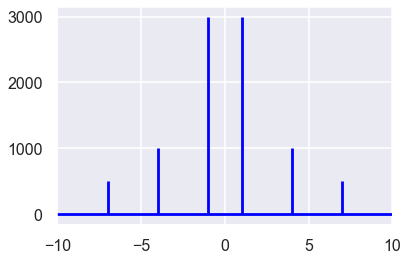

Filter is: 


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3014482676.py:37: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(signalFFT[0], 1*((signalFFT[0]>=g1)&(signalFFT[0]<=g2))|((signalFFT[0]>=-g2)&(signalFFT[0]<=-g1)), 'b', markerfmt=" ", basefmt="-b")


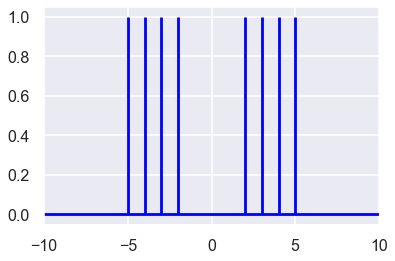

Filtered FFT signal is: 


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3014482676.py:43: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(signalFFT[0], abs(ypftd), 'b', markerfmt=" ", basefmt="-b")


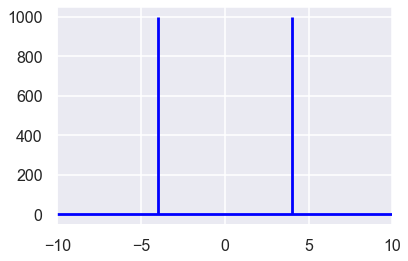

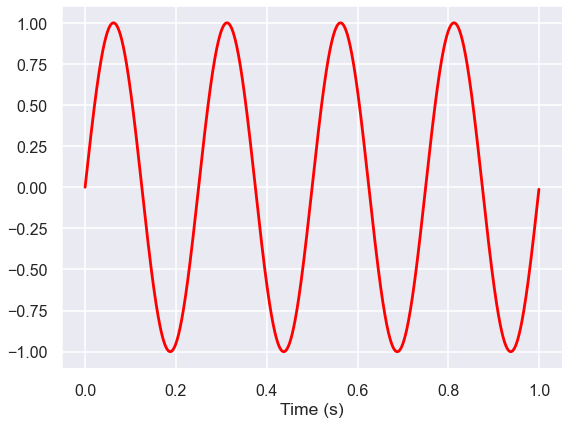

Original signal: 


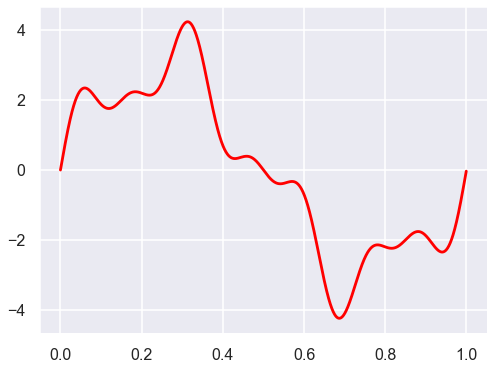

In [88]:
ypftd = Filter([freq, X], 2, 5)

def demoFilter():
  ## demo, for using after "Filer" function (which displays FFT, filter, filtered FFT)
  ## showing inversed FFT signal (filtered one) and original signal
  #
  # t
  #     axes X in time domain of the signal (time)
  #
  # ypftd (y points filtered)
  #     axes Y in time domain of the signal
  #
  # x
  #     axes Y in time domain of the original signal

  plt.figure(figsize = (8, 6))
  plt.plot(t, np.real(ifft(ypftd)), 'r')
  plt.xlabel('Time (s)')
  plt.tight_layout()
  plt.savefig("demoFilter_Resultingsignal.pdf")
  plt.show()
  print("Original signal: ")
  plt.figure(figsize = (8, 6))
  plt.plot(t, x, 'r')
  plt.show()


demoFilter()


# show(freq, abs(X))

# plt.stem(xp, yp, 'b', markerfmt=" ", basefmt="-b")

# xp, yp = filter(0.5, 1, 2)
# show(xp, yp)
# plt.show()
# show(range(x.shape[0]), abs(X))

FFT signal was: 


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3014482676.py:29: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(signalFFT[0], abs(signalFFT[1]), 'b', markerfmt=" ", basefmt="-b")


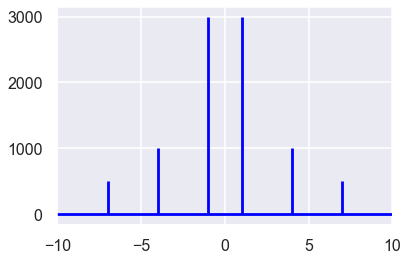

Filter is: 


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3014482676.py:37: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(signalFFT[0], 1*((signalFFT[0]>=g1)&(signalFFT[0]<=g2))|((signalFFT[0]>=-g2)&(signalFFT[0]<=-g1)), 'b', markerfmt=" ", basefmt="-b")


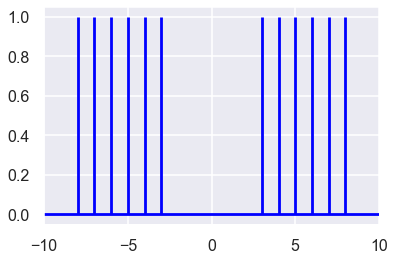

Filtered FFT signal is: 


/var/folders/08/wxb667m16fz7m_x5wlghdvs40000gn/T/ipykernel_31221/3014482676.py:43: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(signalFFT[0], abs(ypftd), 'b', markerfmt=" ", basefmt="-b")


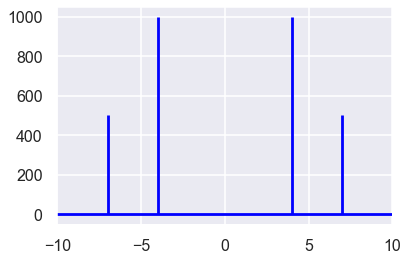

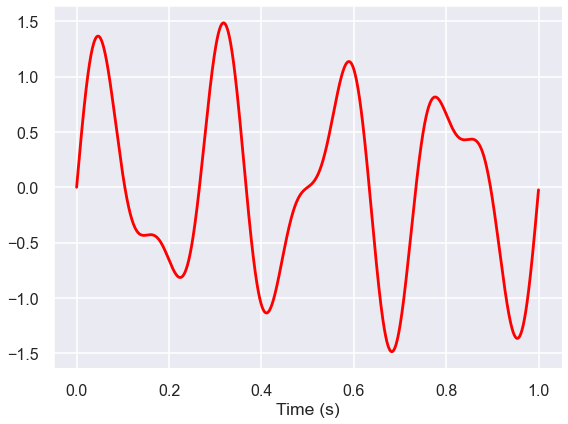

Original signal: 


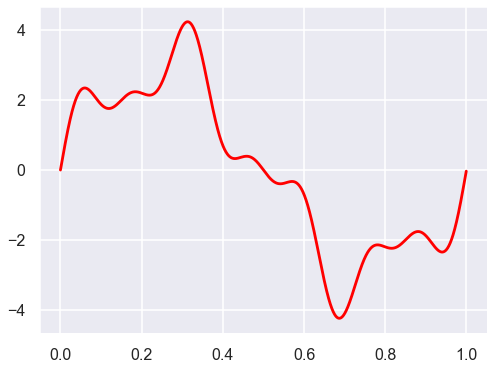

In [86]:
ypftd = Filter([freq, X], 3, 8)

demoFilter()

In [ ]:
# # ypftd = Filter([freq, X], 0, 10)
#
# # demoFilter()
#
# # np.shape(ypftd)
# # print(np.around(x) == np.around(ifft(ypftd))) # :\

## True signal

In [ ]:
# # class Signal():
# #   pass
# #
# # z = Signal()
# # z.x = 1
# # z.y = 2
# # z.name = "name"
# # print(z.name)

# MASSIVE arrays & video

In [ ]:
# def gPYRmaker(depth = 4):
#   # -> list gPYR of np.arrays sized:
#   # gPYR[0].shape =  (301, 592, 528)
#   # gPYR[1].shape =  (301, 296, 264)
#   # gPYR[2].shape =  (301, 148, 132)
#   # gPYR[3].shape =  (301,  74,  66)
#   # gPYR[4].shape =  (301,  37,  33)
#   # len(gPYR) =  5
#
#   # gPYR = [np.zeros((framesGS.shape[0], framesGS.shape[1]//2**0, framesGS.shape[2]//2**0),
#   #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**1, framesGS.shape[2]//2**1)),
#   #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**2, framesGS.shape[2]//2**2)),
#   #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**3, framesGS.shape[2]//2**3)),
#   #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**4, framesGS.shape[2]//2**4))]
#
#   gPYR = []
#   for i in range(depth+1):
#     gPYR.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**i), ceil(framesGS.shape[2]/2**i)]))
#
#
#   for frameIndex in range(framesGS.shape[0]):
#     tmp = GPyr(framesGS[frameIndex], depth)
#     # print(tmp.shape)
#     for l in range(depth + 1):
#       gPYR[l][frameIndex] = tmp[l]
#
#   # shw(tmp[0])
#   # shw(tmp[1])
#   # shw(tmp[2])
#   # shw(tmp[3])
#   # shw(tmp[4])
#
#   print("gPYR[0].shape = ", gPYR[0].shape)
#   print("gPYR[1].shape = ", gPYR[1].shape)
#   print("gPYR[2].shape = ", gPYR[2].shape)
#   print("gPYR[3].shape = ", gPYR[3].shape)
#   print("gPYR[4].shape = ", gPYR[4].shape)
#   print("len(gPYR) = ", len(gPYR))
#
#   return gPYR
#
# def PYRmaker(depth = 4):
#   # -> list gPYR of np.arrays sized:
#   # gPYR[0].shape =  (301, 592, 528)
#   # gPYR[1].shape =  (301, 296, 264)
#   # gPYR[2].shape =  (301, 148, 132)
#   # gPYR[3].shape =  (301,  74,  66)
#   # gPYR[4].shape =  (301,  37,  33)
#   # len(gPYR) =  5
#
#   # PYR = [np.zeros((framesGS.shape[0], framesGS.shape[1], framesGS.shape[2])),
#   #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/2), int(framesGS.shape[2]/2))),
#   #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/4), int(framesGS.shape[2]/4))),
#   #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/8), int(framesGS.shape[2]/8))),
#   #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/16), int(framesGS.shape[2]/16)))]
#
#
#   PYR = []
#   for i in range(depth+1):
#     PYR.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**i), ceil(framesGS.shape[2]/2**i)]))
#
#
#   for frameIndex in range(framesGS.shape[0]):
#     tmp = LPyrOpt(framesGS[frameIndex], depth)
#     for l in range(depth+1):
#       PYR[l][frameIndex] = tmp[l]
#       # print(type(PYR[l][frameIndex][0][0]))
#
#   # shw(tmp[0])
#   # shw(tmp[1])
#   # shw(tmp[2])
#   # shw(tmp[3])
#   # shw(tmp[4])
#
#   print("PYR[0].shape = ", PYR[0].shape)
#   print("PYR[1].shape = ", PYR[1].shape)
#   print("PYR[2].shape = ", PYR[2].shape)
#   print("PYR[3].shape = ", PYR[3].shape)
#   print("PYR[4].shape = ", PYR[4].shape)
#   print("len(PYR) = ", len(PYR))
#
#   return PYR
#
# def gSIGmaker(gPYR):
#
#   gSIG = []
#   for l in range(depth+1):
#     gSIG.append(np.zeros([gPYR[l].shape[1], gPYR[l].shape[2], gPYR[l].shape[0]]))
#     print(gSIG[l].shape)
#
#   for l in range(depth+1):
#     for i in range(gPYR[l].shape[1]):
#       for j in range(gPYR[l].shape[2]):
#         gSIG[l][i,j,:] = gPYR[l][:,i,j]
#
#   return gSIG
#
# def SIGmaker(PYR):
#
#   SIG = []
#   for l in range(depth+1):
#     SIG.append(np.zeros([PYR[l].shape[1], PYR[l].shape[2], PYR[l].shape[0]]))
#     print(SIG[l].shape)
#
#   for l in range(depth+1):
#     for i in range(PYR[l].shape[1]):
#       for j in range(PYR[l].shape[2]):
#         SIG[l][i,j,:] = PYR[l][:,i,j]
#
#   return SIG
#

In [ ]:
# # G = gkern(5)
# # depth = 4
# #
# # gPYR = gPYRmaker()

In [ ]:
G = gkern(5); depth = 4
PYR = PYRmaker()

In [ ]:
# # gSIG = gSIGmaker(gPYR)

In [ ]:
SIG = SIGmaker(PYR)

In [ ]:
# # from numpy.core import function_base
# # plt.plot(np.arange(signal1.shape[0]), signal1, 'r')
# # plt.show()
# #
# # ypftd = Filter([np.arange(signal1.shape[0]), signal1], 0.8, 1.2)
# t, freq = signalAxesX(SIG[0][0, 0, :], 30)
# ypftd = Filter([freq, np.fft.fft(SIG[0][0, 0, :]), 30.1], 0.8, 1.2)
#
# plt.plot(t, np.real(ifft(ypftd)), 'r')
# plt.xlabel('Time (s)')
# plt.tight_layout()
# plt.show()
# print("Original signal: ")
# plt.plot(t, SIG[0][0, 0, :], 'r')
# plt.show()
#
# # added = add_filtered([freq, SIG[0][0, 0, :], 30.1], ypftd)
# # print(added.shape)
# # print(added)
# # show(t, np.real(added))

In [ ]:
# t, freq = signalAxesX(SIG[0][0, 0, :], 30)
#
# plt.figure(figsize = (20, 8))
# plt.plot(t, SIG[0][0, 0, :], 'r')
# plt.ylabel('Pixel value')
#
# plt.show()

In [ ]:
# #forehead pixel
# y0 = 60//2**4
# x0 = 220//2**4

In [ ]:
# t, freq = signalAxesX(SIG[4][y0, x0], 30)
#
# plt.figure(figsize = (20, 8))
# plt.plot(t, SIG[4][y0, x0], 'r')
# plt.ylabel('Pixel value')
#
# plt.show()
#
# # signal1 = signl[y0, x0, :]

In [ ]:
# SIG[4][y0, x0, 0]

In [ ]:
# # X = fft(SIG[4][y0, x0])
# # t, freq = signalAxesX(SIG[4][y0, x0], 30)
# ypftd = Filter([signalAxesX(SIG[4][y0, x0], 30)[1], fft(SIG[4][y0, x0])], 0.8, 1.2)

In [ ]:
# plt.figure(figsize = (20, 8))
# plt.plot(signalAxesX(SIG[4][y0, x0], 30)[0], np.real(ifft(ypftd)), 'r')
# plt.xlabel('Time (s)')
# plt.tight_layout()
# plt.show()
# print("Original signal: ")
# plt.figure(figsize = (20, 8))
# plt.plot(signalAxesX(SIG[4][y0, x0], 30)[0], SIG[4][y0, x0], 'r')
# plt.show()
#

In [ ]:
# fsignl1 = np.log(1+np.abs(np.fft.fft(signal1)))
#
# fsignl1[0] = 0
#
# showFFT(freq, fsignl1)
# print(max(fsignl1))

In [ ]:
# # plt.plot(t, np.log(1+np.abs(np.fft.fft(signal1))), 'r')

In [ ]:
def filter_SIG(SIG, g1 = 0.8, g2 = 1.2):
  # list of np arrays of different sizes -> list of np arrays of same different sizes

  SIG_FFT = []
  for l in range(len(SIG)):
    SIG_FFT.append(np.zeros([SIG[l].shape[0], SIG[l].shape[1], SIG[l].shape[2]]).astype(complex))
    print("SIG_FFT[l].shape = ", SIG_FFT[l].shape)

  SIG_F = []
  for l in range(len(SIG)):
    SIG_F.append(np.zeros([SIG[l].shape[0], SIG[l].shape[1], SIG[l].shape[2]]).astype(complex))
    print("SIG_F[l].shape = ", SIG_F[l].shape)

  SIG_IFFT = []
  for l in range(len(SIG)):
    SIG_IFFT.append(np.zeros([SIG[l].shape[0], SIG[l].shape[1], SIG[l].shape[2]]).astype(complex))
    print("SIG_IFFT[l].shape = ", SIG_IFFT[l].shape)

  for l in range(len(SIG)):
    for h in range(SIG[l].shape[0]):
      for w in range(SIG[l].shape[1]):
        t, freq = signalAxesX(SIG[l][h, w, :], 30.1)
        SIG_FFT[l][h, w, :] = np.fft.fft(SIG[l][h, w, :])
        SIG_F[l][h, w, :] = filter(freq, SIG_FFT[l][h, w, :], g1, g2)
        SIG_IFFT[l][h, w, :] = ifft(SIG_F[l][h, w, :]) #real but sometimes negative values

  return SIG_IFFT

In [ ]:
SIG_IFFT = filter_SIG(SIG)

In [ ]:
def SIG_to_PYR(SIG):

  PYR = []
  for i in range(depth+1):
    PYR.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**i), ceil(framesGS.shape[2]/2**i)]).astype(complex))

  for l in range(len(SIG)):
    for i in range(PYR[l].shape[1]):
      for j in range(PYR[l].shape[2]):
        PYR[l][:,i,j] = SIG[l][i,j,:]
    print(PYR[l].shape)

  return PYR

In [ ]:
PYR_IFFT = SIG_to_PYR(SIG_IFFT)

In [ ]:
PYR[0].shape

In [ ]:
def ADD(PYR, PYR_IFFT, alpha = 1):

  ADDed = []
  for l in range(len(PYR)):
    ADDed.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**l), ceil(framesGS.shape[2]/2**l)]).astype(complex))
    print(ADDed[l].shape)

  for l in range(len(PYR)):
    for fr in range(PYR[l].shape[0]):
      ADDed[l][fr] = PYR[l][fr] + alpha * PYR_IFFT[l][fr]

  return ADDed

In [ ]:
ADDed = ADD(PYR, PYR_IFFT)

In [ ]:
PYR[0].shape

In [ ]:
def REC(PYR):
  RECed = np.zeros(PYR[0].shape).astype(complex)

  for fr in range(PYR[0].shape[0]):
    RECed[fr] = rec([PYR[l][fr] for l in range(len(PYR))])
  # print(RECed[fr].shape)

  return RECed

In [ ]:
RECed = REC(ADDed)

In [ ]:
def make_vid(np_array, fps = 30.1, sec = 10):
  # np_array.shape = (301 frames, 592 high, 528 wide) -> video.avi file and all frames.jpg in "frames" folder

  # width = np_array.shape[2]
  # hight = np_array.shape[1]
  channel = 3

  path = "frames"

  if os.path.exists(path):
    shutil.rmtree(path)
  time.sleep(.0000000000000001)
  os.makedirs(path)

  print("Directory '% s' created" % path)
  os.chdir(path)

  for frame_count in range(int(fps*sec)):
    # new_p = Image.fromarray(shw(np_array[frame_count]))
    # new_p = Image.fromarray(np_array[frame_count])
    print(np_array.dtype, np_array.shape)
    cv2.imwrite(f'frm{str(frame_count).zfill(3)}.jpg', np_array[frame_count])

    # if new_p.mode != 'RGB':
    #   new_p = new_p.convert('RGB')

    # new_p.save("frm%03d.jpg" % frame_count)

  frm = cv2.imread('frm000.jpg', 0)
  print(type(frm))
  hight = frm.shape[0]
  width = frm.shape[1]

  fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
  out = cv2.VideoWriter('output_video.avi', fourcc, fps, (width, hight))

  for filename in sorted(os.listdir('.')):
    img = cv2.imread(filename)
    out.write(img)

  out.release()

  !open output_video.avi -a vlc

  os.chdir('..')


In [ ]:
make_vid(abs(RECed))

# np.array -> video

In [ ]:
def make_vid(np_array, fps = 30.1, sec = 10):
  # np_array.shape = (301 frames, 592 high, 528 wide) -> video.avi file and all frames.jpg in "frames" folder

  width = np_array.shape[2]
  hight = np_array.shape[1]
  channel = 3

  path = "frames"

  if os.path.exists(path):
    shutil.rmtree(path)
  time.sleep(.0000000000000001)
  os.makedirs(path)

  print("Directory '% s' created" % path)
  os.chdir(path)

  for frame_count in range(int(fps*sec)):
    # new_p = Image.fromarray(shw(np_array[frame_count]))
    new_p = Image.fromarray(np_array[frame_count])

    # if new_p.mode != 'RGB':
    #   new_p = new_p.convert('RGB')

    new_p.save("frm%03d.jpg" % frame_count)

  out = cv2.VideoWriter('output_video.avi', 0, fps, (width, hight))

  # for frame_count in range(int(fps*sec)):
  #   img = cv2.imread("frm%03d.jpg" % frame_count)
  #   out.write(img)

  for filename in sorted(glob.glob('*.jpg')):
      img = cv2.imread(filename)
      out.write(img)

  out.release()

  !open output_video.avi -a vlc

  os.chdir('..')

def play_vid():
  path = "frames"
  os.chdir(path)
  !open output_video.avi -a vlc
  os.chdir('..')

# def load_images_from_folder(folder):
#   images = []
#   for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder,filename))
#     if img is not None:
#       images.append(img)
#   return images

In [ ]:
# # iop = 0
# # directory = ("frames '%s' " % iop)
# # print(directory)

In [ ]:
# # o = 4
# # width = PYR[o].shape[2]
# # hieght = PYR[o].shape[1]
# # channel = 3
# #
# # fps = 30.1
# # sec = 10
# #
# # path = ("frames '%s' " % iop)
# #
# # if os.path.exists(path):
# #   shutil.rmtree(path)
# # time.sleep(.0000000000000001)
# # os.makedirs(path)
# #
# # print("Directory '% s' created" % path)
# #
# # os.chdir(path)
# #
# # for frame_count in range(int(fps*sec)):
# #   # img = np.random.randint(0,255, (hieght, width, channel), dtype = np.uint8)
# #   img = PYR[o][frame_count]
# #   img = img.astype(np.uint8)
# #   img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# #
# #   new_p = Image.fromarray(PYR[o][frame_count])
# #   if new_p.mode != 'RGB':
# #     new_p = new_p.convert('RGB')
# #
# #
# #   new_p.save("frm%d.jpg" % frame_count)
# #
# # out = cv2.VideoWriter('output_video.avi', 0, 30, (width, hieght))
# #
# # for filename in glob.glob('*.jpg'):
# #   img = cv2.imread(filename)
# #   out.write(img)
# #
# # out.release()
# #
# # !open output_video.avi -a vlc
# #
# # os.chdir('..')
# #
# # iop+=1

In [ ]:
# make_vid(frames)

In [ ]:
# play_vid()


# Overall algorithm

In [ ]:
a = np.arange(9)
print(a)
print(a[::2])
print(9//2)

In [ ]:
!ls

In [ ]:
np.save('f', np.array([1, 3]))

In [ ]:
from PIL import Image
import numpy as np
# import glob
import cv2
import scipy.stats as st
import os
import shutil
import time
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import timeit
from math import ceil


def loadVid(path):
  # video.mp4 -> np.array

  vidcap = cv2.VideoCapture(path)
  success,image = vidcap.read()

  path = "frames_orig"
  if os.path.exists(path):
    shutil.rmtree(path)
  time.sleep(.0000000000000001)
  os.makedirs(path)
  print("Directory '% s' created" % path)
  os.chdir(path)

  framesCount = 0
  while success:
    cv2.imwrite("frame%03d.jpg" % framesCount, image)     # save frame as JPEG file
    success,image = vidcap.read()

    # print('Read a new frame: ', success)
    framesCount += 1

  print("Video has been loaded. Frames count is", framesCount)

  frames = []
  # files = glob.glob("*.jpg")
  files = sorted(os.listdir())

  for frame in files:
    image = cv2.imread(frame)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # print(type(image))
    frames.append(image)

  frames = np.array(frames)
  print('frames array shape:', frames.shape)
  # frames shape: (301, 592, 528, 3)
  # 301 frames
  # 592 high on 528 wide pixels each frame
  # 3 channels each pixel

  os.chdir("..")
  return frames

def frameInfo(path):

  im = np.array(Image.open(path))

  print("type(im) " , type(im))
  # <class 'numpy.ndarray'>

  print("im.shape ", im.shape)
  # (592, 528, 3)

  print("im.dtype " , im.dtype)
  # uint8

  print("pixel[0,0] is im[0, 0] = \n", im[0, 0]) #?
  # [100 150  60]
  # the value at (y, x) = (100, 150),
  # the 100th row and
  # 150th column of pixels

  print("row 0 is im[0, :] = \n", im[0, :])
  # the value at (y, :) = (0, :),
  # the 100th row and
  # all column of pixels

  # print(type(im[100, 105]))
  # <class 'numpy.ndarray'>

  print("pixel shape (im[0, 0]).shape = ", (im[0, 0]).shape)
  # (3,)

  print("row shape (im[100, :]).shape = " , (im[100, :]).shape)
  # (528, 3)

def shw(img):
  imgN = (img + 255) * 0.5
  # cv2.imshow('shw() function',imgN/255)
  # cv2.waitKey()
  # cv2.destroyAllWindows()
  # cv2.waitKey(1)
  return imgN

def cv2imshow(img):
  cv2.imshow('cv2imshow function',img/255)
  cv2.waitKey()
  cv2.destroyAllWindows()
  cv2.waitKey(1)

def toGS(img):
  rgb_weights = [0.2989, 0.5870, 0.1140]
  u = np.dot(img[...,:3], rgb_weights)
  print("u.shape = ", u.shape)
  return u

def ktoK(k, u):
  K = np.copy(k)

  while K.shape[0] < u.shape[0]:
    if K.shape[0]+2>u.shape[0]:
      K = np.pad(K, pad_width=((0, 1),(0, 0)), mode='constant', constant_values=0)
      break
    K = np.pad(K, pad_width=((1, 1),(0, 0)), mode='constant', constant_values=0)

  while K.shape[1] < u.shape[1]:
    if K.shape[1]+2>u.shape[1]:
      K = np.pad(K, pad_width=((0, 0),(0, 1)), mode='constant', constant_values=0)
      break
    K = np.pad(K, pad_width=((0, 0),(1, 1)), mode='constant', constant_values=0)

  return K

def gkern(kernlen=21, nsig=3):
  """Returns a 2D Gaussian kernel array."""

  interval = (2*nsig+1.)/(kernlen)
  x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
  kern1d = np.diff(st.norm.cdf(x))
  kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
  kernel = kernel_raw/kernel_raw.sum()
  print("G.shape = ", kernel.shape)
  return kernel

# def Convolve(u, G, bdSame):
#   n = u.shape[0] - 1
#
#   N = u.shape[1] - 1
#
#   pd = np.array([int(G.shape[0]/2), int(G.shape[1]/2)])
#
#   v = np.zeros((u.shape[0], u.shape[1]))
#
#   # padding
#   idx0 = np.arange(-int((G.shape[0]/2)), int((G.shape[0]/2))+1)
#   idx1 = np.arange(-int((G.shape[1]/2)), int((G.shape[1]/2))+1)
#
#   if bdSame: #zeros border = True
#     u = np.pad(u, pad_width=pd, mode='constant', constant_values=0)
#
#     for i in idx0:
#       for j in idx1:
#         v += G[i+pd[0], j+pd[1]] * u[i+pd[0]:n+i+1+pd[0], j+pd[1]:N+j+1+pd[1]]
#
#   else: #periodic border = False
#     for i in idx0:
#       for j in idx1:
#         v += G[i+pd[0], j+pd[1]] * np.roll(u, (i, j), axis = (0,1))
#
#   return v

def Convolve(u, G, bdSame):
  print("Convolve")
  print("u.dtype =", u.dtype)
  print("G.dtype =", G.dtype)

  G.astype
  n = u.shape[0] - 1
  # print("n = ", n)

  N = u.shape[1] - 1
  # print("N = ", N)

  pd = np.array([int(G.shape[0]/2), int(G.shape[1]/2)])
  #print("pd = ", pd)

  v = np.zeros((u.shape[0], u.shape[1]))
  # print("v = \n", v)
  # print("v.shape = ", v.shape)


  # padding
  idx0 = np.arange(-int((G.shape[0]/2)), int((G.shape[0]/2))+1)
  idx1 = np.arange(-int((G.shape[1]/2)), int((G.shape[1]/2))+1)
  # print("idx0 = ", idx0)
  # print("idx1 = ", idx1)

  if bdSame: #zeros border = True
    #extending u
    u = np.pad(u, pad_width=pd, mode='constant', constant_values=0)
    # print("u = \n", u)
    # print("u.shape = ", u.shape)

    # loop
    for i in idx0:
      for j in idx1:
        # print("\n\ni, j = ", i, j, "(but in python it's ", i+pd[0], j+pd[1], ")")
        # print("G[", i, ",", j, "] = " , G[i+pd[0], j+pd[1] ], " \n *")
        # print("u [", i, ":", n+i+1, ",", j, ":", N+j+1, "] = \n", u[i+pd[0]:n+i+1+pd[0], j+pd[1]:N+j+1+pd[1]], "\n =")
        v += G[i+pd[0], j+pd[1]] * u[i+pd[0]:n+i+1+pd[0], j+pd[1]:N+j+1+pd[1]]
        # print("v = \n", v)

  else: #periodic border = False
    for i in idx0:
      for j in idx1:
        # print("\n\ni, j = ", i, j, "(but in python it's ", i+pd[0], j+pd[1], ")")
        # print("G[", i, ",", j, "] = " , G[i+pd[0], j+pd[1] ], " \n *")
        # print("u [", i%n, ":", (n+i+1)%n, ",", j%N, ":", (N+j+1)%N, "] = \n", np.roll(u, (i, j), axis = (0,1)), "\n =")
        v += G[i+pd[0], j+pd[1]] * np.roll(u, (i, j), axis = (0,1))
        # print("v = \n", v)

  return v



def GPyr(pic, depth):

  v = pic.copy()
  gp = [v]

  for i in range(depth):
    # v = Convolve(v, G, True)
    v = cv2.filter2D(v, -1, G)
    v = v[::2,::2]
    gp.append(v)

  return gp

# def GPyr3(pic, depth):
#
#   v = pic.copy()
#   gp = [v]
#
#   for i in range(depth):
#     for ch in range(3):
#       v[ch] = Convolve(v[ch], G, True)
#       v[ch] = v[ch][::2,::2]
#     gp.append(v)
#
#   return gp

def LPyr(gp):


  lp = []
  for i in range(len(gp)-1):
    # print(i)
    pic = cv2.resize(gp[i+1], (gp[i].shape[1], gp[i].shape[0]), interpolation = cv2.INTER_LANCZOS4)
    L = cv2.subtract(gp[i],pic)
    lp.append(L)

  lp.append(gp[-1])
  return lp

def LPyrOpt(pic, depth):

  # gp = GPyr(pic, depth)
  gp = GPyr(pic, depth)

  lp = []

  for i in range(len(gp)-1):
    # print(i)
    # print(type(pic[0,0]))
    pic = cv2.resize(gp[i+1], (gp[i].shape[1], gp[i].shape[0]), interpolation = cv2.INTER_LANCZOS4).astype('uint8')
    # print(type(pic[0,0]))
    print(gp[i+1].dtype)
    # print("LPyrOpt: pic.shape", pic.shape, type(pic))
    # pic /= 255
    L = cv2.subtract(gp[i].astype('uint8'), pic)
    # print("LPyrOpt: L.shape", L.shape)

    lp.append(L)

  lp.append(gp[-1])
  return lp

def rec(lp):
  # np.array -> np.array
  pic = np.real(lp[-1])
  # print(type(pic[0][0]))
  # pic = np.real(pic)
  # print(type(pic[0][0]))

  for i in range(len(lp)-2, -1, -1):
    pic = np.real(lp[i]) + cv2.resize(pic, (lp[i].shape[1], lp[i].shape[0]), interpolation = cv2.INTER_LANCZOS4)

  return pic

def show(xpoints, ypoints):
  plt.plot(xpoints, ypoints)
  plt.show()

def showFFT(xpoints, ypoints):
  plt.figure(figsize = (12, 6))
  plt.stem(xpoints, ypoints, 'b', markerfmt=" ", basefmt="-b")
  plt.show()

def signalAxesX(signal, sr):
  # np.array x float -> np.array x np.array
  # getting arrays for axes X for correct displaying the signal both
  # in time domain and Fourier domain

  N = len(signal)
  # t = np.arange(0, N/sr, 1/sr)
  t = np.arange(N)/sr

  n = np.concatenate((np.arange((N+1)//2), np.arange((N+1)//2 - N , 0)))
  T = N/sr
  freq = n/T

  return t, freq

def gPYRmaker(depth = 4):
  # -> list gPYR of np.arrays sized:
  # gPYR[0].shape =  (301, 592, 528)
  # gPYR[1].shape =  (301, 296, 264)
  # gPYR[2].shape =  (301, 148, 132)
  # gPYR[3].shape =  (301,  74,  66)
  # gPYR[4].shape =  (301,  37,  33)
  # len(gPYR) =  5

  # gPYR = [np.zeros((framesGS.shape[0], framesGS.shape[1]//2**0, framesGS.shape[2]//2**0),
  #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**1, framesGS.shape[2]//2**1)),
  #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**2, framesGS.shape[2]//2**2)),
  #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**3, framesGS.shape[2]//2**3)),
  #         np.zeros((framesGS.shape[0], framesGS.shape[1]//2**4, framesGS.shape[2]//2**4))]

  gPYR = []
  for i in range(depth+1):
    gPYR.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**i), ceil(framesGS.shape[2]/2**i)]))


  for frameIndex in range(framesGS.shape[0]):
    tmp = GPyr(framesGS[frameIndex], depth)
    # print(tmp.shape)
    for l in range(depth + 1):
      gPYR[l][frameIndex] = tmp[l]

  # shw(tmp[0])
  # shw(tmp[1])
  # shw(tmp[2])
  # shw(tmp[3])
  # shw(tmp[4])

  print("gPYR[0].shape = ", gPYR[0].shape)
  print("gPYR[1].shape = ", gPYR[1].shape)
  print("gPYR[2].shape = ", gPYR[2].shape)
  print("gPYR[3].shape = ", gPYR[3].shape)
  print("gPYR[4].shape = ", gPYR[4].shape)
  print("len(gPYR) = ", len(gPYR))

  return gPYR

def filter(xpoints, ypoints, g1, g2):
  # xpoints = np.array([-l, -g2, -g2, -g1, -g1, g1, g1, g2, g2, l])
  # ypoints = np.array([0, 0, 1, 1, 0, 0, 1,1,0,0])

  if xpoints.shape == ypoints.shape:
    filt = 1*((xpoints>=g1)&(xpoints<=g2))|((xpoints>=-g2)&(xpoints<=-g1))
  else:
    print("Error, shapes xp and yp don't match.")

  return ypoints * filt

# def Filter(signalFFT, g1, g2):
#   # function with demonstarion of filtering, main work of which is
#   # using "filter" function. Retunrns y points filtered (in Fourier domain, filtered freqs)
#   #
#   # ypftd = Filter([xp, yp], 0, 6)
#   # xp, yp is array of points
#   # g1, g2 filter limits
#
#
#   print("FFT signal was: ")
#   plt.stem(signalFFT[0], abs(signalFFT[1]), 'b', markerfmt=" ", basefmt="-b")
#   # plt.xlim(-10, 10)
#   plt.show()
#
#   ypftd = filter(signalFFT[0], signalFFT[1], g1, g2)
#
#   print("Filter is: ")
#   plt.stem(signalFFT[0], 1*((signalFFT[0]>=g1)&(signalFFT[0]<=g2))|((signalFFT[0]>=-g2)&(signalFFT[0]<=-g1)), 'b', markerfmt=" ", basefmt="-b")
#   # plt.xlim(-10, 10)
#   plt.show()
#
#   print("Filtered FFT signal is: ")
#   plt.stem(signalFFT[0], abs(ypftd), 'b', markerfmt=" ", basefmt="-b")
#   # plt.xlim(-10, 10)
#   plt.show()
#
#   return ypftd

def PYRmaker(depth = 4):
  # -> list gPYR of np.arrays sized:
  # gPYR[0].shape =  (301, 592, 528)
  # gPYR[1].shape =  (301, 296, 264)
  # gPYR[2].shape =  (301, 148, 132)
  # gPYR[3].shape =  (301,  74,  66)
  # gPYR[4].shape =  (301,  37,  33)
  # len(gPYR) =  5

  # PYR = [np.zeros((framesGS.shape[0], framesGS.shape[1], framesGS.shape[2])),
  #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/2), int(framesGS.shape[2]/2))),
  #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/4), int(framesGS.shape[2]/4))),
  #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/8), int(framesGS.shape[2]/8))),
  #         np.zeros((framesGS.shape[0], int(framesGS.shape[1]/16), int(framesGS.shape[2]/16)))]

  PYR = []
  for i in range(depth+1):
    PYR.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**i), ceil(framesGS.shape[2]/2**i)]))


  for frameIndex in range(framesGS.shape[0]):
    tmp = LPyrOpt(framesGS[frameIndex], depth)
    for l in range(depth+1):
      print("tmp[l].shape =", tmp[l].shape)
      print("PYR[l][frameIndex].shape = ", PYR[l][frameIndex].shape)
      PYR[l][frameIndex] = tmp[l]
      # print(type(PYR[l][frameIndex][0][0]))

  # shw(tmp[0])
  # shw(tmp[1])
  # shw(tmp[2])
  # shw(tmp[3])
  # shw(tmp[4])

  print("PYR[0].shape = ", PYR[0].shape)
  print("PYR[1].shape = ", PYR[1].shape)
  print("PYR[2].shape = ", PYR[2].shape)
  print("PYR[3].shape = ", PYR[3].shape)
  print("PYR[4].shape = ", PYR[4].shape)
  print("len(PYR) = ", len(PYR))

  return PYR

# def PYRmaker3():
#
#   # for frameIndex in range(framesGS.shape[0]):
#   #   for l in range(depth+1):
#   #     for i in range(PYR.shape[3]):
#   #       PYR[l][frameIndex][3] = PYRmaker()
#   #       # print(type(PYR[l][frameIndex][0][0]))
#   PYR = []
#   for i in range(depth+1):
#     PYR.append(np.zeros([frames.shape[0], ceil(frames.shape[1]/2**i), ceil(frames.shape[2]/2**i), 3]))
#
#   for ch in range(3):
#     for frameIndex in range(framesGS.shape[0]):
#       tmp = LPyrOpt(framesGS[frameIndex][ch], depth)
#       for l in range(depth+1):
#         print("tmp[l].shape =", tmp[l].shape)
#         print("PYR[l][frameIndex].shape = ", PYR[l][frameIndex].shape)
#         PYR[l][frameIndex, :, :, ch] = tmp[l]
#         print(type(PYR[l][frameIndex][0][0]))
#
#   # shw(tmp[0])
#   # shw(tmp[1])
#   # shw(tmp[2])
#   # shw(tmp[3])
#   # shw(tmp[4])
#
#   print("PYR[0].shape = ", PYR[0].shape)
#   print("PYR[1].shape = ", PYR[1].shape)
#   print("PYR[2].shape = ", PYR[2].shape)
#   print("PYR[3].shape = ", PYR[3].shape)
#   print("PYR[4].shape = ", PYR[4].shape)
#   print("len(PYR) = ", len(PYR))
#
#   return PYR


# def gSIGmaker(gPYR):
#
#   gSIG = []
#   for l in range(depth+1):
#     gSIG.append(np.zeros([gPYR[l].shape[1], gPYR[l].shape[2], gPYR[l].shape[0]]))
#     print(gSIG[l].shape)
#
#   for l in range(depth+1):
#     for i in range(gPYR[l].shape[1]):
#       for j in range(gPYR[l].shape[2]):
#         gSIG[l][i,j,:] = gPYR[l][:,i,j]
#
#   return gSIG

def SIGmaker(PYR):

  SIG = []
  for l in range(depth+1):
    SIG.append(np.zeros([PYR[l].shape[1], PYR[l].shape[2], PYR[l].shape[0]]))
    print(SIG[l].shape)

  for l in range(depth+1):
    for i in range(PYR[l].shape[1]):
      for j in range(PYR[l].shape[2]):
        SIG[l][i,j,:] = PYR[l][:,i,j]

  return SIG

def filter_SIG(SIG, g1 = 0.8, g2 = 1.2):
  # list of np arrays of different sizes -> list of np arrays of same different sizes

  SIG_FFT = []
  for l in range(len(SIG)):
    SIG_FFT.append(np.zeros([SIG[l].shape[0], SIG[l].shape[1], SIG[l].shape[2]], dtype = "F"))
    print("SIG_FFT[l].shape = ", SIG_FFT[l].shape)

  SIG_F = []
  for l in range(len(SIG)):
    SIG_F.append(np.zeros([SIG[l].shape[0], SIG[l].shape[1], SIG[l].shape[2]], dtype = "F"))
    print("SIG_F[l].shape = ", SIG_F[l].shape)

  SIG_IFFT = []
  for l in range(len(SIG)):
    SIG_IFFT.append(np.zeros([SIG[l].shape[0], SIG[l].shape[1], SIG[l].shape[2]], dtype = "F"))
    print("SIG_IFFT[l].shape = ", SIG_IFFT[l].shape)

  for l in range(len(SIG)):
    for h in range(SIG[l].shape[0]):
      for w in range(SIG[l].shape[1]):
        t, freq = signalAxesX(SIG[l][h, w, :], 30.1)
        SIG_FFT[l][h, w, :] = np.fft.fft(SIG[l][h, w, :])
        SIG_F[l][h, w, :] = filter(freq, SIG_FFT[l][h, w, :], g1, g2)
        SIG_IFFT[l][h, w, :] = ifft(SIG_F[l][h, w, :]) #real but sometimes negative values

  return SIG_IFFT

def SIG_to_PYR(SIG):

  PYR = []
  for i in range(depth+1):
    PYR.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**i), ceil(framesGS.shape[2]/2**i)], dtype = "F"))

  for l in range(len(SIG)):
    for i in range(PYR[l].shape[1]):
      for j in range(PYR[l].shape[2]):
        PYR[l][:,i,j] = SIG[l][i,j,:]
    print(PYR[l].shape)

  return PYR

def ADD(PYR, PYR_IFFT, alpha = 1):

  ADDed = []
  for l in range(len(PYR)):
    ADDed.append(np.zeros([framesGS.shape[0], ceil(framesGS.shape[1]/2**l), ceil(framesGS.shape[2]/2**l)], dtype = "F"))
    print(ADDed[l].shape)

  for l in range(len(PYR)):
    for fr in range(PYR[l].shape[0]):
      ADDed[l][fr] = PYR[l][fr] + alpha * PYR_IFFT[l][fr]

  return ADDed

def REC(PYR):
  RECed = np.zeros(PYR[0].shape, dtype = "F")

  for fr in range(PYR[0].shape[0]):
    RECed[fr] = rec([PYR[l][fr] for l in range(len(PYR))])
  # print(RECed[fr].shape)

  return RECed

def make_vid(np_array, fps = 30.1, sec = 10):
  # np_array.shape = (301 frames, 592 high, 528 wide) -> video.avi file and all frames.jpg in "frames" folder

  # width = np_array.shape[2]
  # hight = np_array.shape[1]
  channel = 3

  path = "frames"

  if os.path.exists(path):
    shutil.rmtree(path)
  time.sleep(.0000000000000001)
  os.makedirs(path)

  print("Directory '% s' created" % path)
  os.chdir(path)

  for frame_count in range(int(fps*sec)):
    # new_p = Image.fromarray(shw(np_array[frame_count]))
    # new_p = Image.fromarray(np_array[frame_count])
    print(np_array.dtype, np_array.shape)
    cv2.imwrite(f'frm{str(frame_count).zfill(3)}.jpg', np_array[frame_count])

    # if new_p.mode != 'RGB':
    #   new_p = new_p.convert('RGB')

    # new_p.save("frm%03d.jpg" % frame_count)

  frm = cv2.imread('frm000.jpg', 0)
  print(type(frm))
  hight = frm.shape[0]
  width = frm.shape[1]

  fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
  out = cv2.VideoWriter('output_video.avi', fourcc, fps, (width, hight))

  for filename in sorted(os.listdir('.')):
    img = cv2.imread(filename)
    out.write(img)

  out.release()

  !open output_video.avi -a vlc

  os.chdir('..')


def play_vid():
  path = "frames"
  os.chdir(path)
  !open output_video.avi -a vlc
  os.chdir('..')


In [ ]:
G = gkern(5); depth = 4
frames = loadVid('face.mp4')

In [ ]:

alpha = 5

In [ ]:
framesGS = frames[...,0]
PYR = PYRmaker()
SIG = SIGmaker(PYR)
SIG_IFFT = filter_SIG(SIG)
PYR_IFFT = SIG_to_PYR(SIG_IFFT)

ADDed = ADD(PYR, PYR_IFFT, alpha)
RECed = REC(ADDed)
CH0 = RECed

RECed.shape
np.save("CH0", RECed)

In [ ]:
framesGS = frames[...,1]
PYR = PYRmaker()
SIG = SIGmaker(PYR)
SIG_IFFT = filter_SIG(SIG)
PYR_IFFT = SIG_to_PYR(SIG_IFFT)
ADDed = ADD(PYR, PYR_IFFT, alpha)
RECed = REC(ADDed)
CH1 = RECed
np.save("CH1", RECed)

In [ ]:
framesGS = frames[...,2]
PYR = PYRmaker()
SIG = SIGmaker(PYR)
SIG_IFFT = filter_SIG(SIG)
PYR_IFFT = SIG_to_PYR(SIG_IFFT)
ADDed = ADD(PYR, PYR_IFFT, alpha)
RECed = REC(ADDed)
CH2 = RECed
np.save("CH2", RECed)


In [ ]:

# a = np.zeros([5,4,10])
# b = np.zeros([5,4,10])
# c = np.zeros([5,4,10])
# print(np.stack([a, b,c ], axis = 3).shape)

CH0 = np.load('CH0.npy')
CH1 = np.load('CH1.npy')
CH2 = np.load('CH2.npy')



In [ ]:
print(CH0.shape)

In [ ]:
# fin = np.stack([CH0.astype('float64'), CH1.astype('float64'), CH2.astype('float64')], axis = 3)
fin = np.stack([CH0, CH1, CH2], axis = 3)

fin.shape

In [ ]:
fin.dtype

In [ ]:
os.chdir("..")
!ls

In [ ]:
# make_vid(np.flip(RECed, -1), 30, 10)
# make_vid(abs(PYR_IFFT[0]), 30, 10)
make_vid(abs(fin), 30, 10)

In [ ]:
# np_array = frames

fps = 30; sec = 10
# width = np_array.shape[2]
# hight = np_array.shape[1]
os.chdir('frames')
frm = cv2.imread('frm000.jpg', 0)
print(type(frm))
hight = frm.shape[0]
width = frm.shape[1]

out = cv2.VideoWriter('output_video.avi', 0, fps, (width, hight))

for filename in sorted(os.listdir('.')):
  img = cv2.imread(filename)
  out.write(img)

out.release()

!open output_video.avi -a vlc

os.chdir('..')

In [ ]:
play_vid()

In [ ]:
def make_vid(np_array, fps = 30.1, sec = 10):
  # np_array.shape = (301 frames, 592 high, 528 wide) -> video.avi file and all frames.jpg in "frames" folder

  # width = np_array.shape[2]
  # hight = np_array.shape[1]
  channel = 3

  path = "frames"

  if os.path.exists(path):
    shutil.rmtree(path)
  time.sleep(.0000000000000001)
  os.makedirs(path)

  print("Directory '% s' created" % path)
  os.chdir(path)

  for frame_count in range(int(fps*sec)):
    # new_p = Image.fromarray(shw(np_array[frame_count]))
    new_p = Image.fromarray(abs(np_array[frame_count]))

    if new_p.mode != 'RGB':
      new_p = new_p.convert('RGB')

    new_p.save("frm%03d.jpg" % frame_count)

  frm = cv2.imread('frm000.jpg', 0)
  print(type(frm))
  hight = frm.shape[0]
  width = frm.shape[1]

  fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
  out = cv2.VideoWriter('output_video.avi', fourcc, fps, (width, hight))

  for filename in sorted(os.listdir('.')):
    img = cv2.imread(filename)
    out.write(img)

  out.release()

  !open output_video.avi -a vlc

  os.chdir('..')